# Prediction of Default Risk at LoanTap using Logistic Regression

In the rapidly evolving digital lending landscape, Non-Banking Financial Companies (NBFCs) like LoanTap leverage technology to provide quick and accessible credit solutions on consumer friendly terms to salaried professionals and businessmen. A critical challenge for any lending institution is accurately assessing the creditworthiness of applicants to mitigate the inherent risk of loan defaults. \
This case study explores the application of Logistic Regression, a foundational machine learning algorithm, to build a robust predictive model for loan default. By analyzing various applicant attributes and historical loan performance data, this project aims to identify key risk factors and predict the probability of a prospective borrower defaulting. The insights derived from this model will enable LoanTap to make more informed, data-driven lending decisions.This case study will focus on the underwriting process behind Personal Loans only.

#### Importing Libraries

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import datetime
import time
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc

warnings.simplefilter(action='ignore',category=Warning)
# setting the Custom Pallette to have color coding consistent for all charts
custom_palette = ["#7eb0d5", "#fd7f6f", "#b2e061", "#bd7ebe", "#ffb55a"]
sns.set_palette(custom_palette)

#### Exploratory Data Analysis

In [260]:
df=pd.read_csv("logistic_regression.csv")
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [261]:
# look at the datatypes of the columns
print('#################################################')
print(f'Shape of the dataset is:{df.shape}')
print('#################################################')
print(df.info())
print('#################################################')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('#################################################')
print(f'Number of duplicate entries: \n{df.duplicated().value_counts()}')

#################################################
Shape of the dataset is:(396030, 27)
#################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status        

In [262]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


Understandiing data distribution across categorical columns

In [263]:
# Non-numeric columns
obj_cols = df.select_dtypes(include='object').columns
obj_cols=[item for item in obj_cols if item not in ['earliest_cr_line','issue_d','address']]

for col in obj_cols:
    print()
    print(f'Total Unique Values in {col} column are :- {df[col].nunique()}')
    percent=df[col].value_counts(normalize=True)*100
    percent=percent[percent>0.1]
    print(f'Value counts in {col} column are :-\n {percent}')
    print()
    print('-'*120)


Total Unique Values in term column are :- 2
Value counts in term column are :-
  36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in grade column are :- 7
Value counts in grade column are :-
 B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: grade, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in sub_grade column are :- 35
Value counts in sub_grade column are :-
 B3    6.730551
B4    6.464409
C1    5.974800
C2    5.701588
B2    5.680125
B5    5.576598
C3    5.358432
C4    5.120824
B1    4.843572
A5    4.677928
C5    4.606722
D1    4.038330
A4    3.986819
D2    3.522713
D3    3.086382
D4    2.943464
A3    2.670505
A1    2.456632
D5    2.449309
A2    2

### EDA Insights

- The dataset consists of 396030 records with 27 features, out of which one of them ia a target variable.
- Loan_Status, which is the target, is a categorical variable.
- Out of all 26 features, 12 are numerical columns and 14 are object columns.
- There are no duplicates.
- There are 22927 missing values in emp_title,18301 in emp_length,1756 in title,276 in revol_util,37795 in mort_acc and 535 in pub_rec_bankruptcies.
- Based on their data types and number of unique values,the columns term, grade, sub_grade, emp_length, home_ownership, emp_title, title, verification_status,purpose, initial_list_status,pub_rec, and application_type, are categorical variables
- issue_d and earliest_cr_line can be converted to datetime and further month and year can be extracted.
- The term and emp_length column contains spaces and alphanumeric characters.
- Replace '36 months' with '36' and '60 months' with '60' in term column.
- Replace '<1 year' with 0 and '10 + years' with 10 in emp_length column.
- emp_title and title have lot of unique values and can be dropped as it will not have an impact on the loan approval.
- Extract zip code from address and address column can be dropped.
- As we already have grade column,we can drop sub-grade column

### Transformation of columns:

In [264]:
#convert to datetime
df['issue_year']=pd.to_datetime(df['issue_d']).dt.year.astype('object')
df['issue_month']=pd.to_datetime(df['issue_d']).dt.month.astype('object')
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line']).dt.year.astype('object')

# extract zip code from address columns
df['zip_code']=df['address'].apply(lambda x:x[-5:])

## Visual Analysis

### Univariate Analysis

i.Categorical Variables

In [265]:
cat_cols=['loan_status','term', 'grade', 'sub_grade', 
       'home_ownership', 'verification_status', 
        'emp_length','initial_list_status','application_type','zip_code','issue_year','issue_month','purpose','earliest_cr_line']

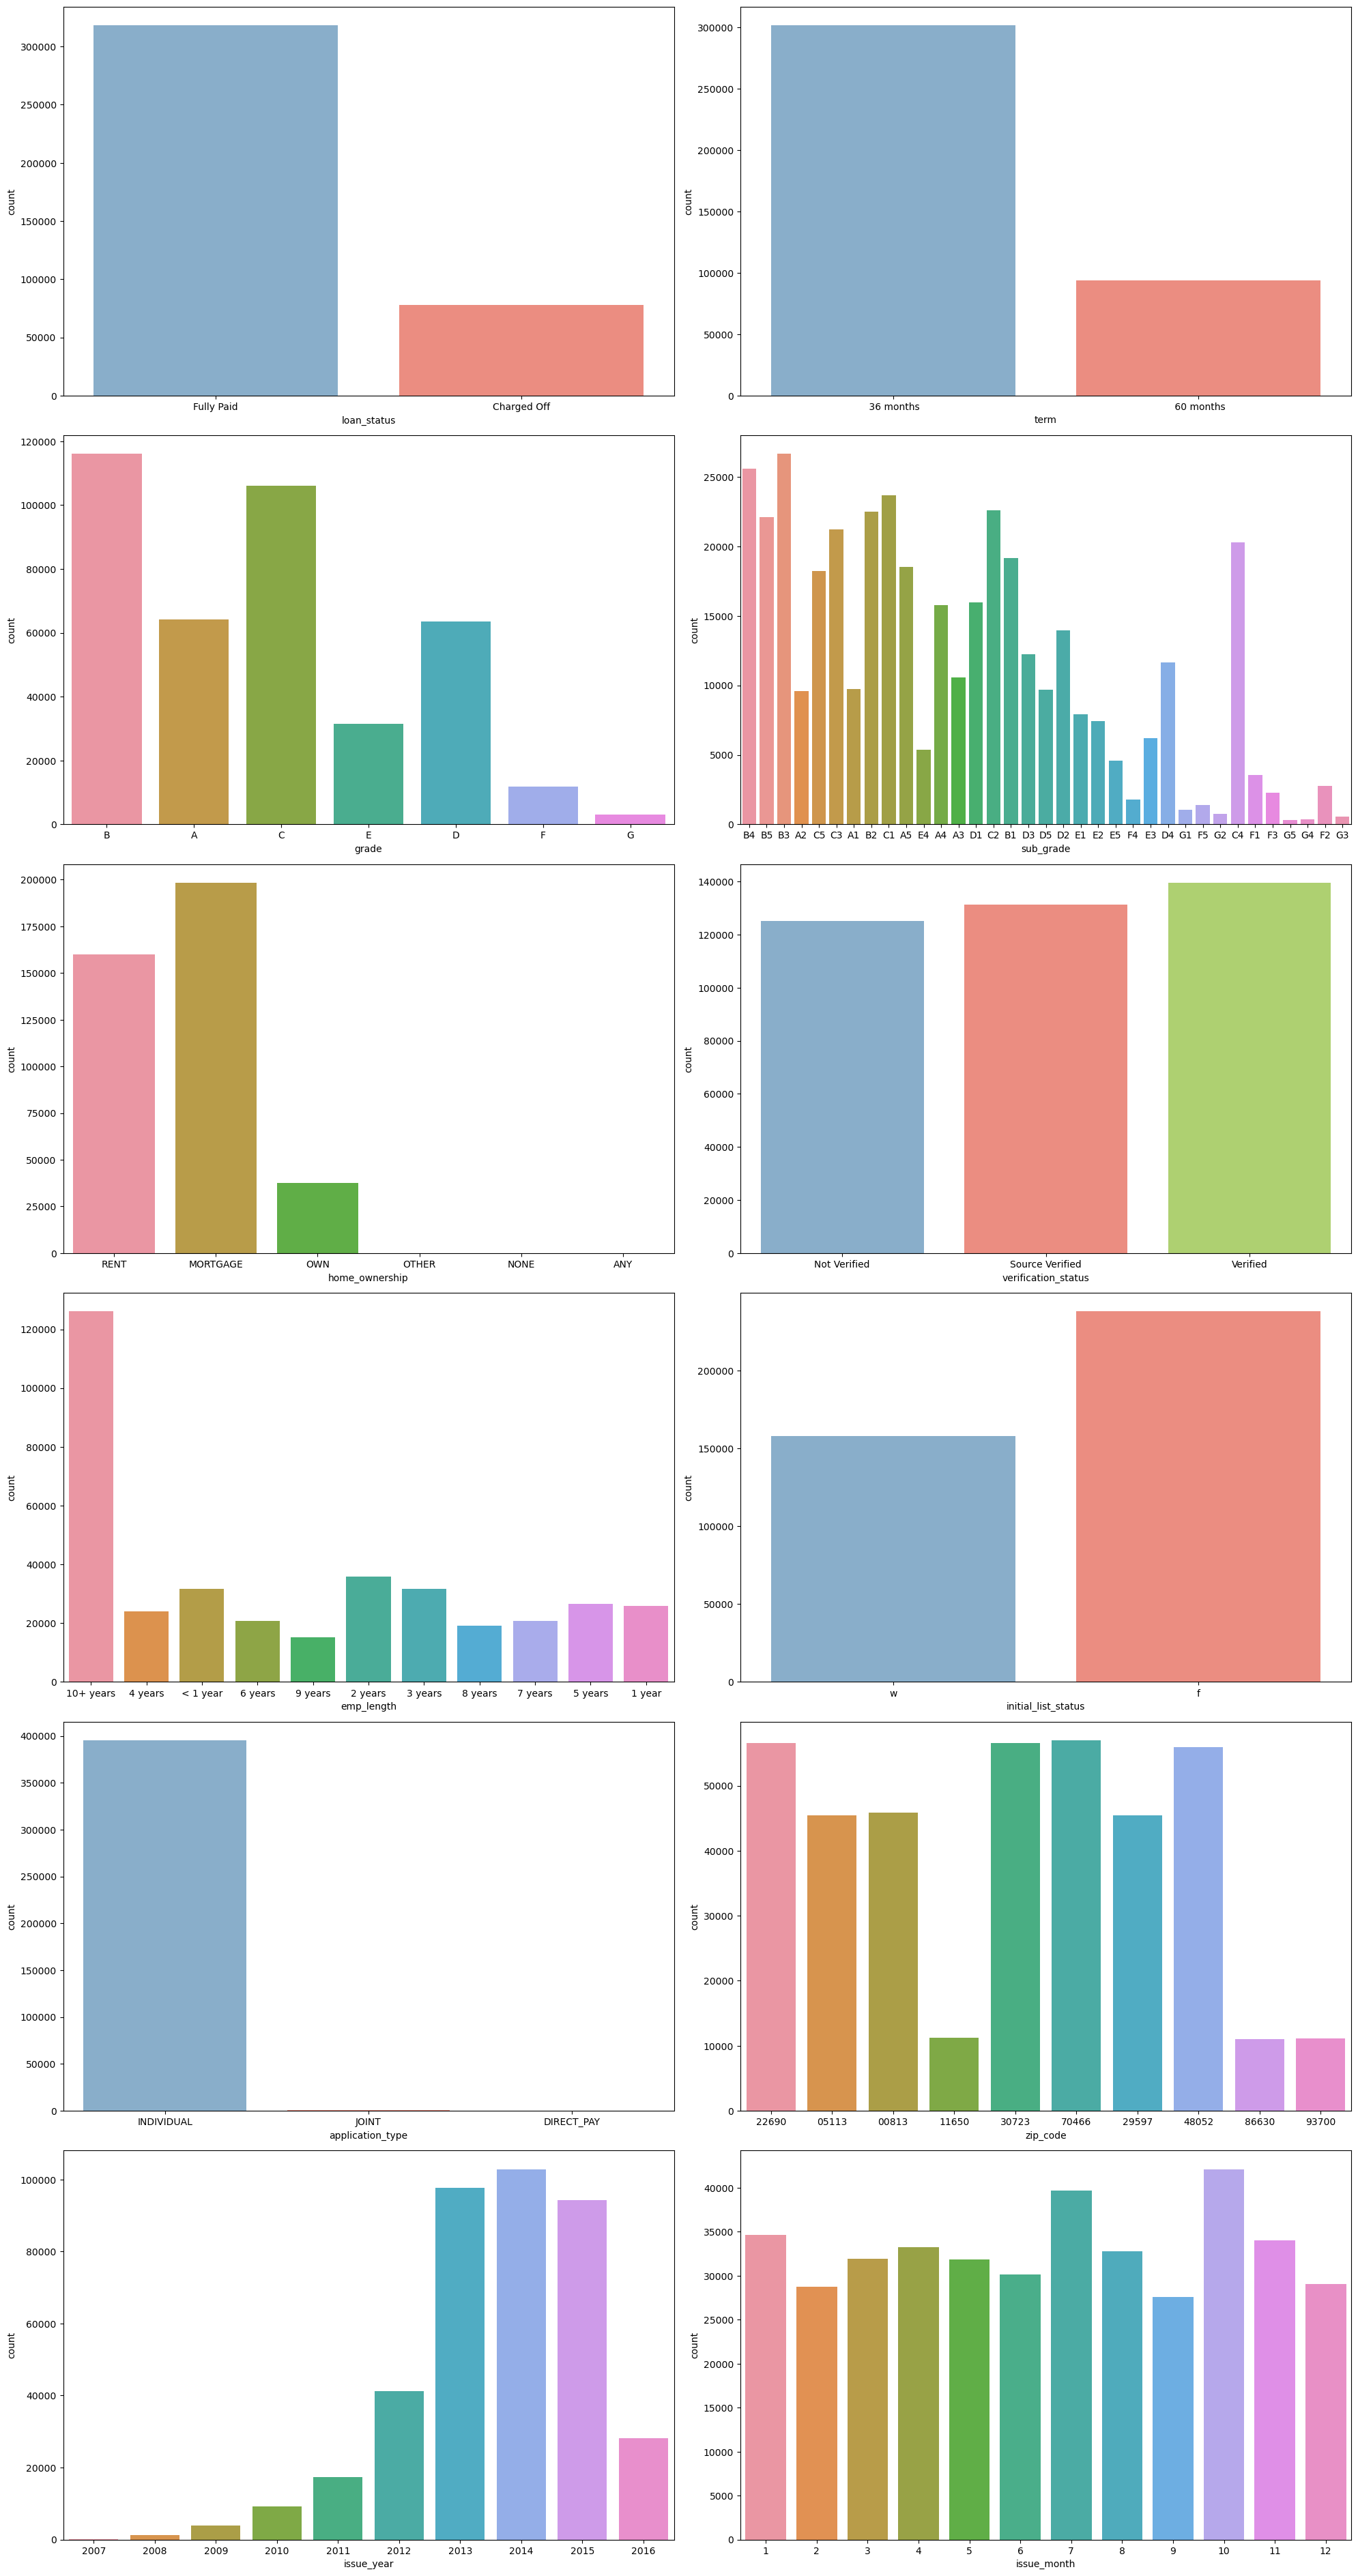

In [266]:
cat_cols1=['loan_status','term', 'grade', 'sub_grade', 
       'home_ownership', 'verification_status', 
        'emp_length','initial_list_status','application_type','zip_code','issue_year','issue_month']
plt.figure(figsize=(20,50))
i=1
for col in cat_cols1:
   ax=plt.subplot(8,2,i)
   sns.countplot(df[col],ax=ax) 
   i+=1
    
plt.tight_layout()
plt.show()


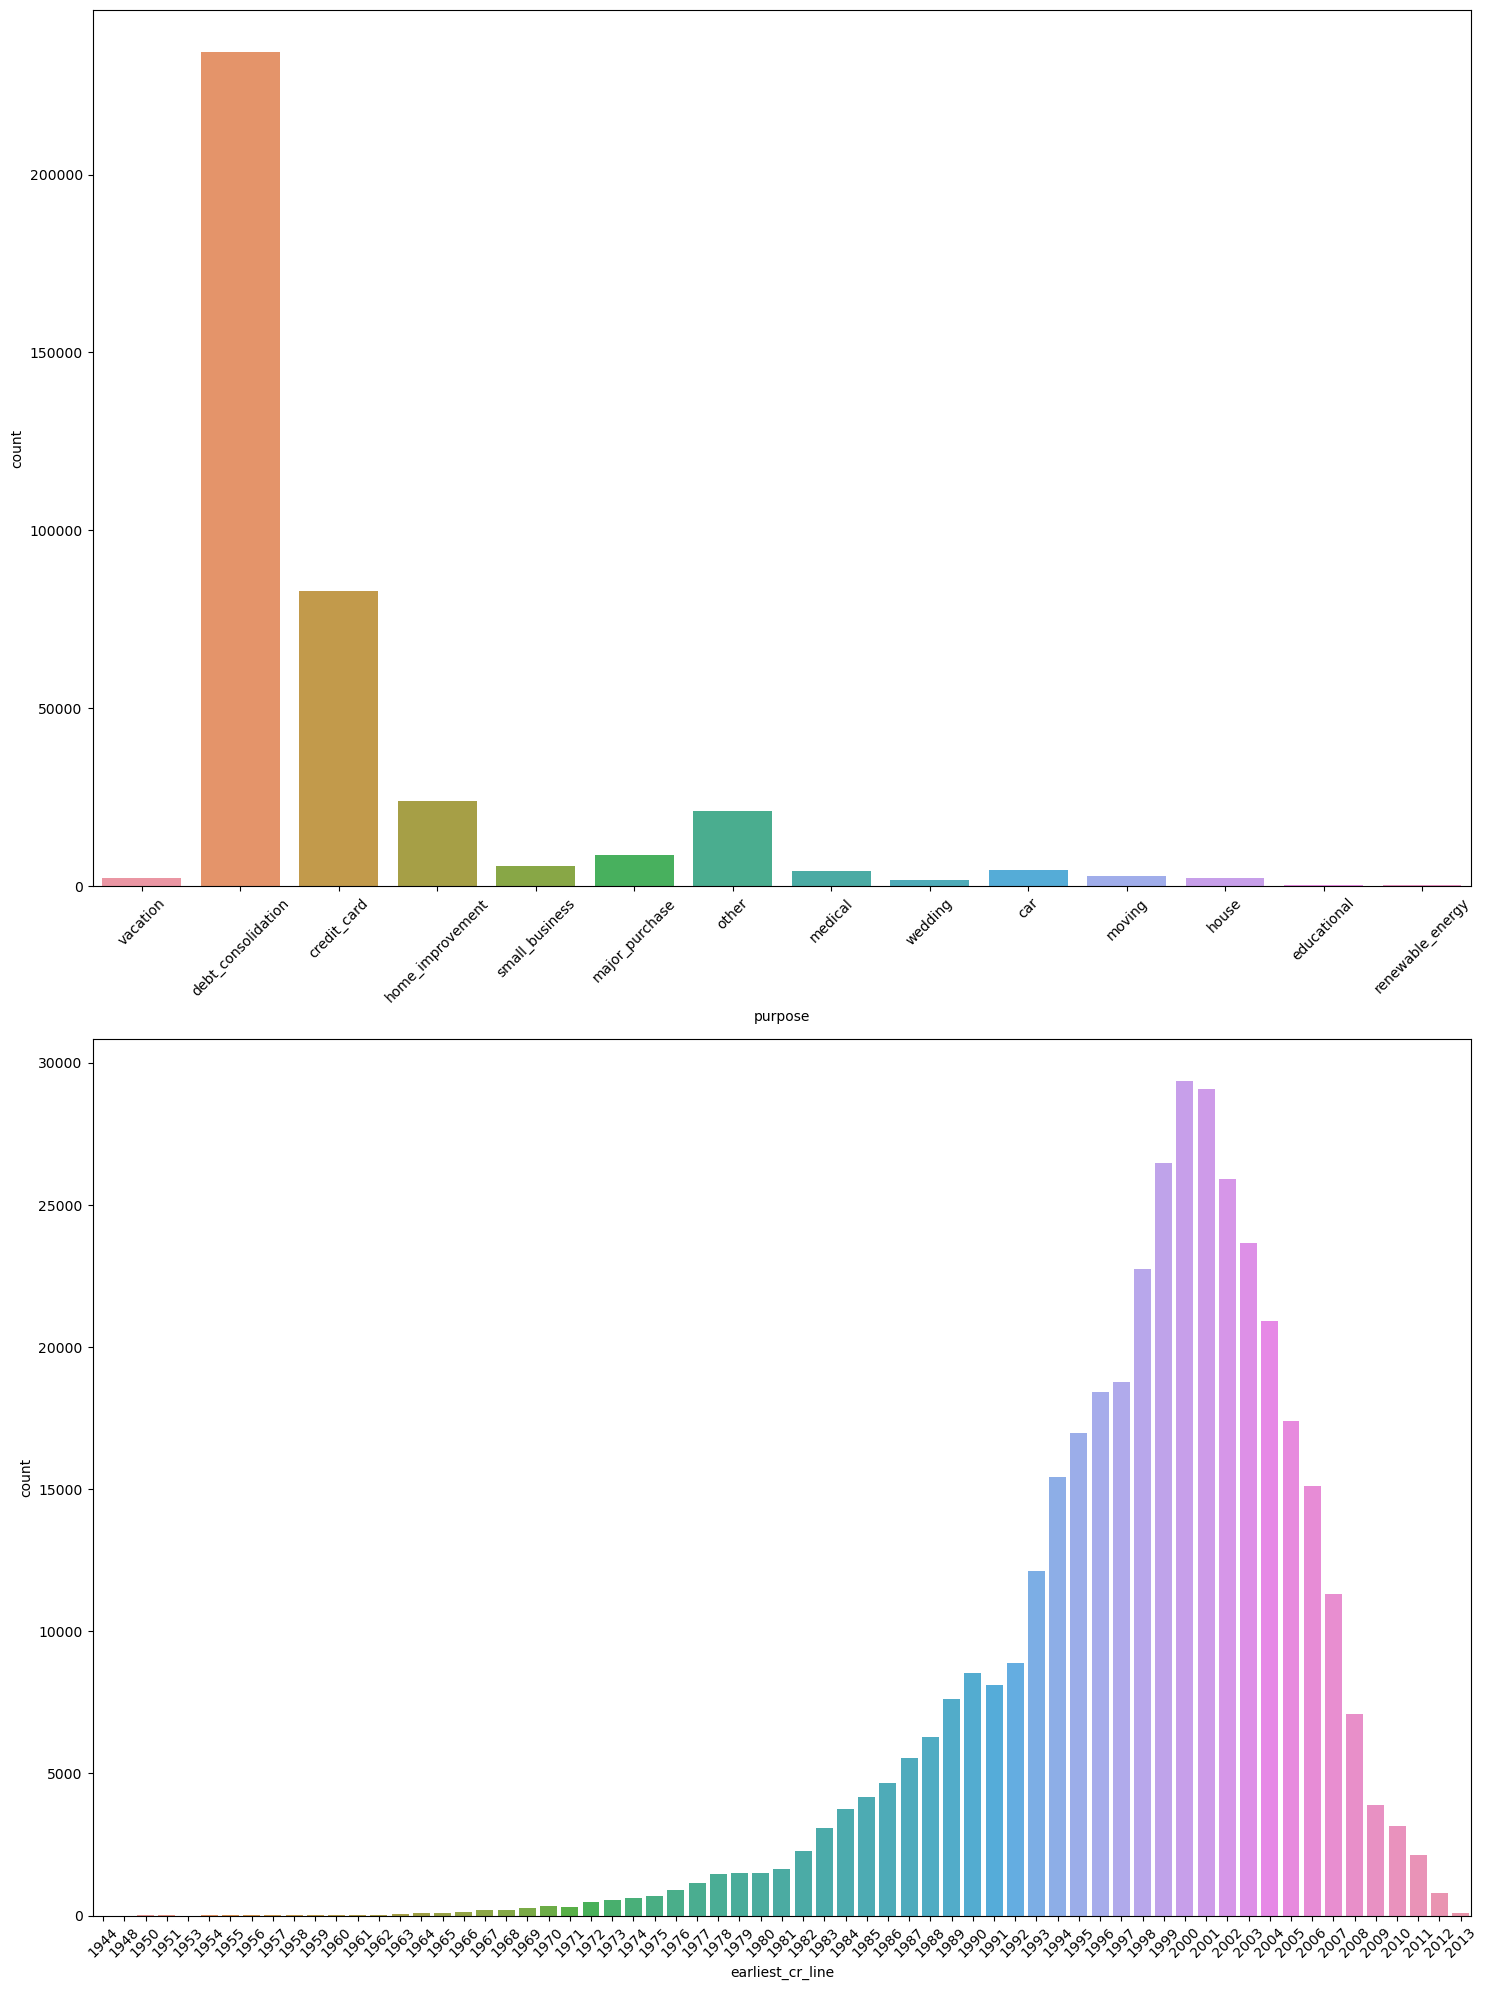

In [267]:
cat_cols2=['purpose','earliest_cr_line']            #with lot of unique values

plt.figure(figsize=(15,20))
i=1
for col in cat_cols2:
   ax=plt.subplot(2,1,i)
   sns.countplot(df[col],ax=ax) 
   plt.xticks(rotation=45)
   i+=1
    
plt.tight_layout()
plt.show()


- Majority of the loans are for 3 years.
- Most of the loans have grade B followed by Grade C.
- Most of the loans have sub-grade B3 followed by B4.
- Most of the loans have been taken by borrowers whose house is mortgaged,followed by rent.
- Most of the loans have been taken for debt consolidation followed by credit card.
- Most of the loans have initial list status as 'f'.
- Majority of the loans have been taken by individuals.
- Majority of the loans are verified.
- Majority of the loans have been taken by borrowers who have employment length of more than 10 years.
- Most of the loans are issued in October month, followed by July.

ii. Continuous Variables

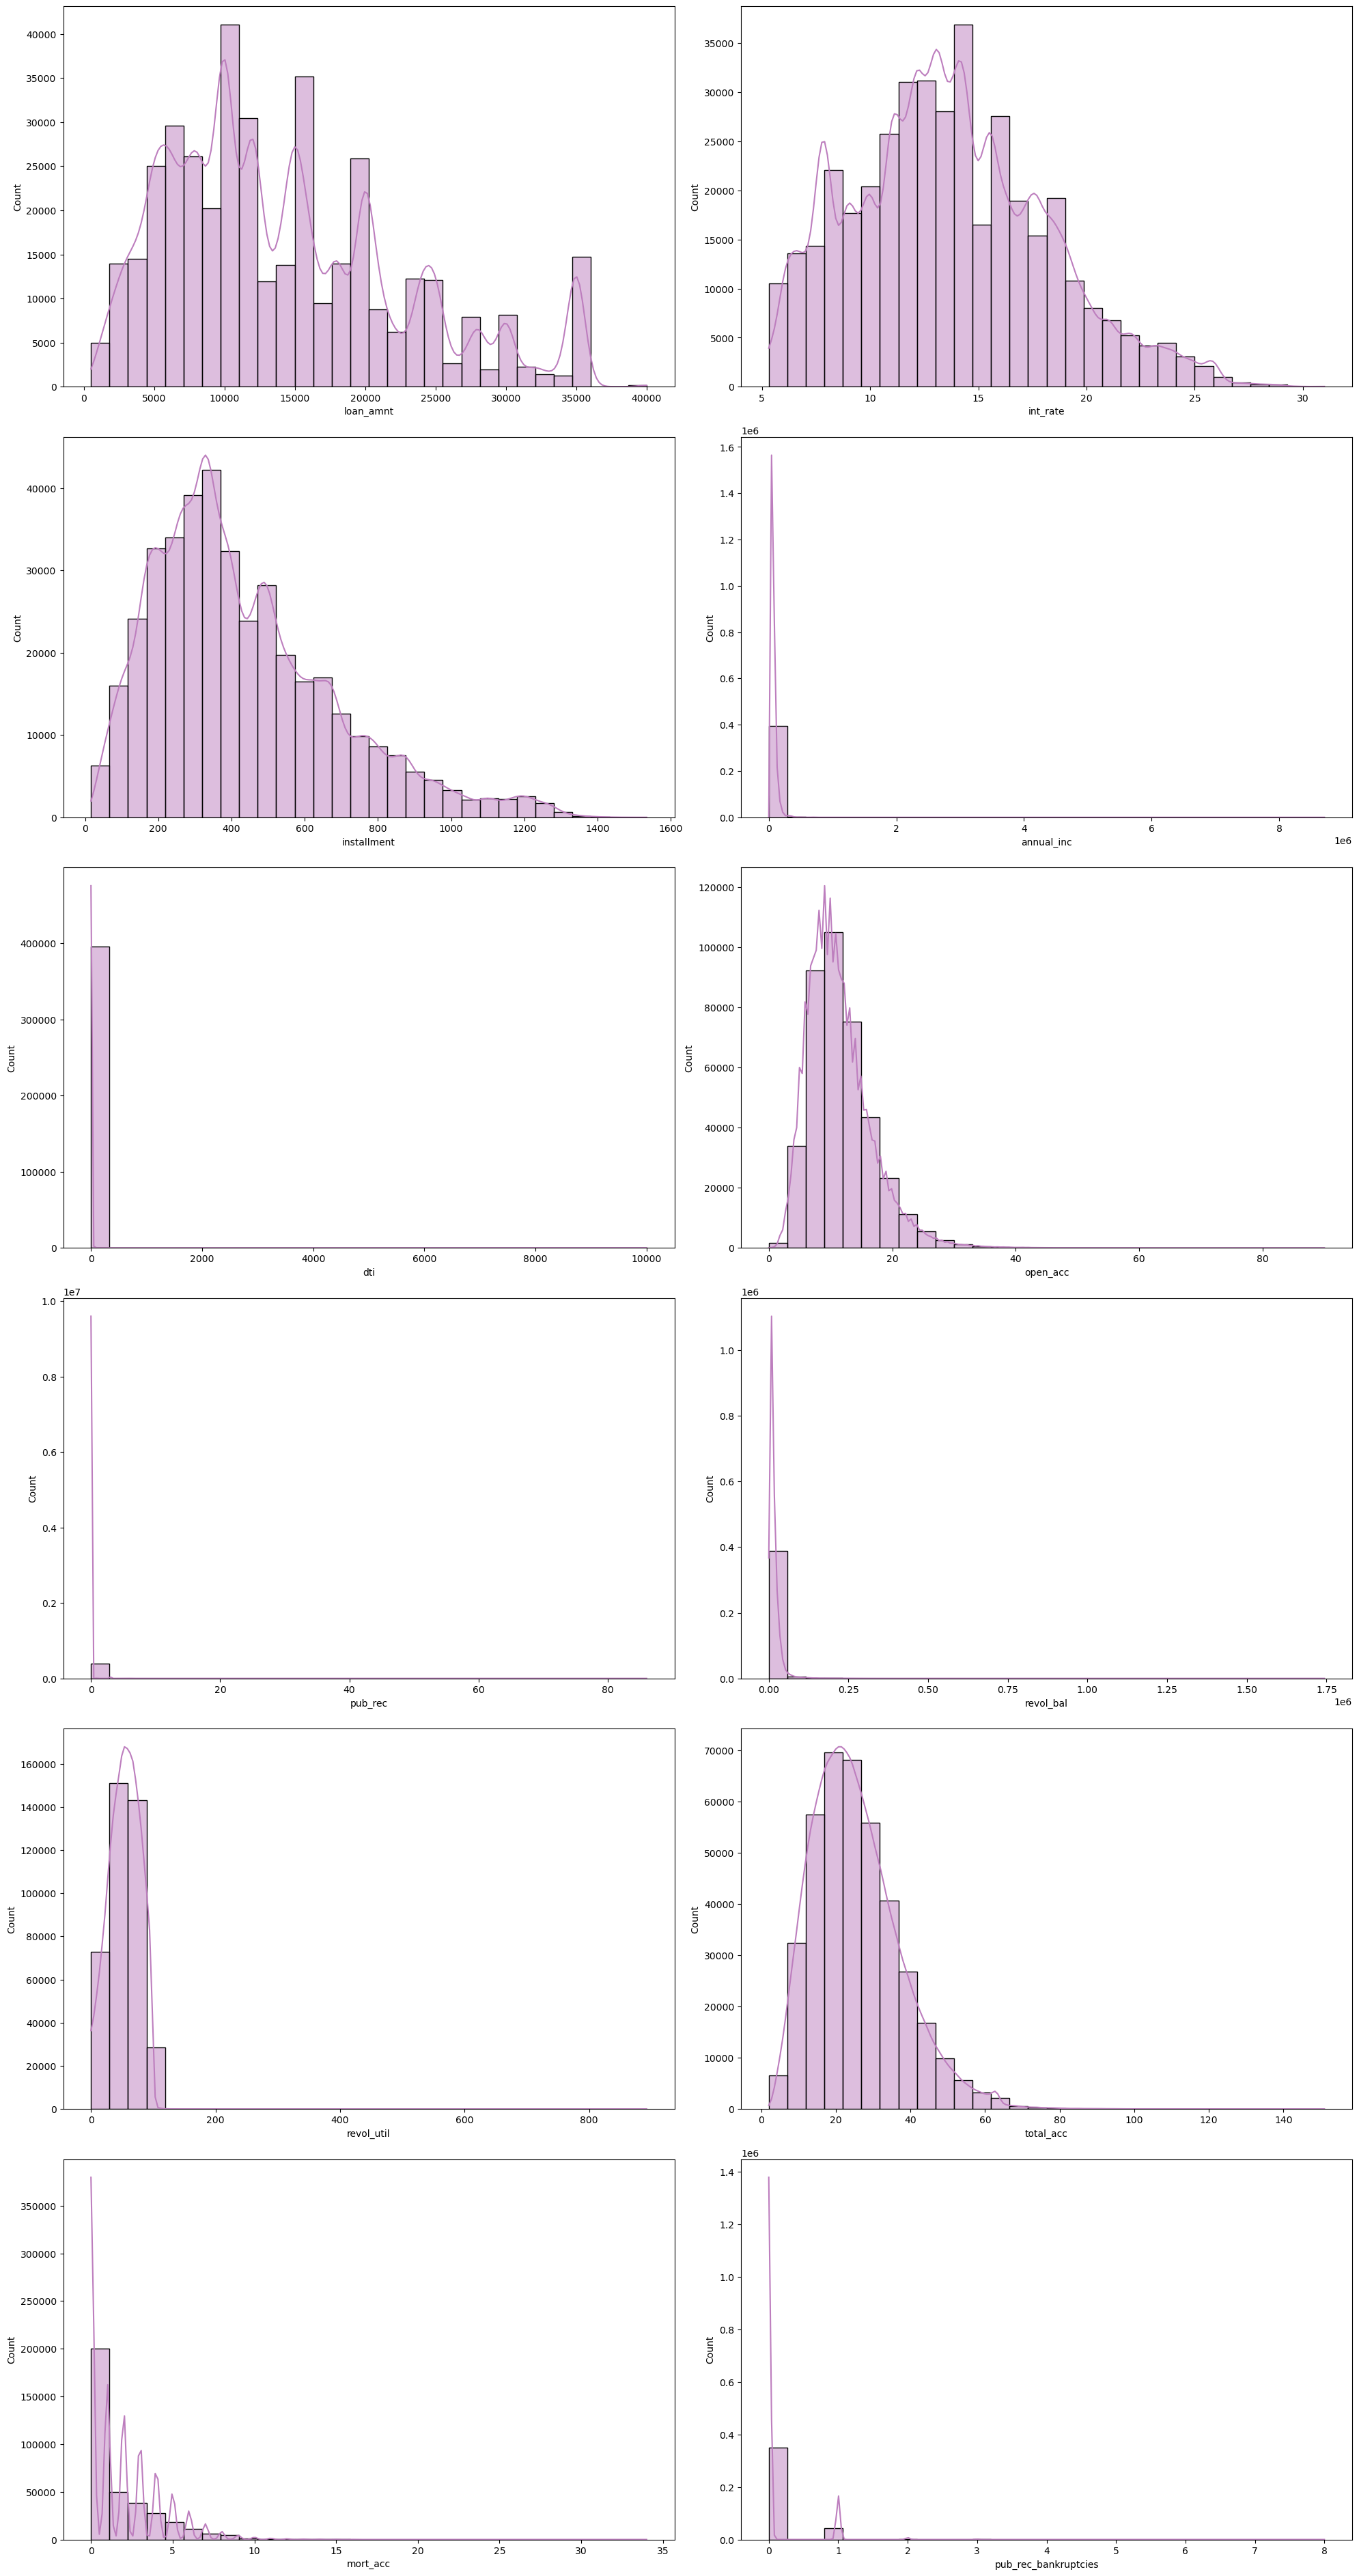

In [268]:
num_cols=df.select_dtypes(include='float64').columns
plt.figure(figsize=(20,50))
i=1
for col in num_cols:
   ax=plt.subplot(8,2,i)
   sns.histplot(df[col],ax=ax,kde=True,bins=30,color=custom_palette[3]) 
   i+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

i.Categorical Variables

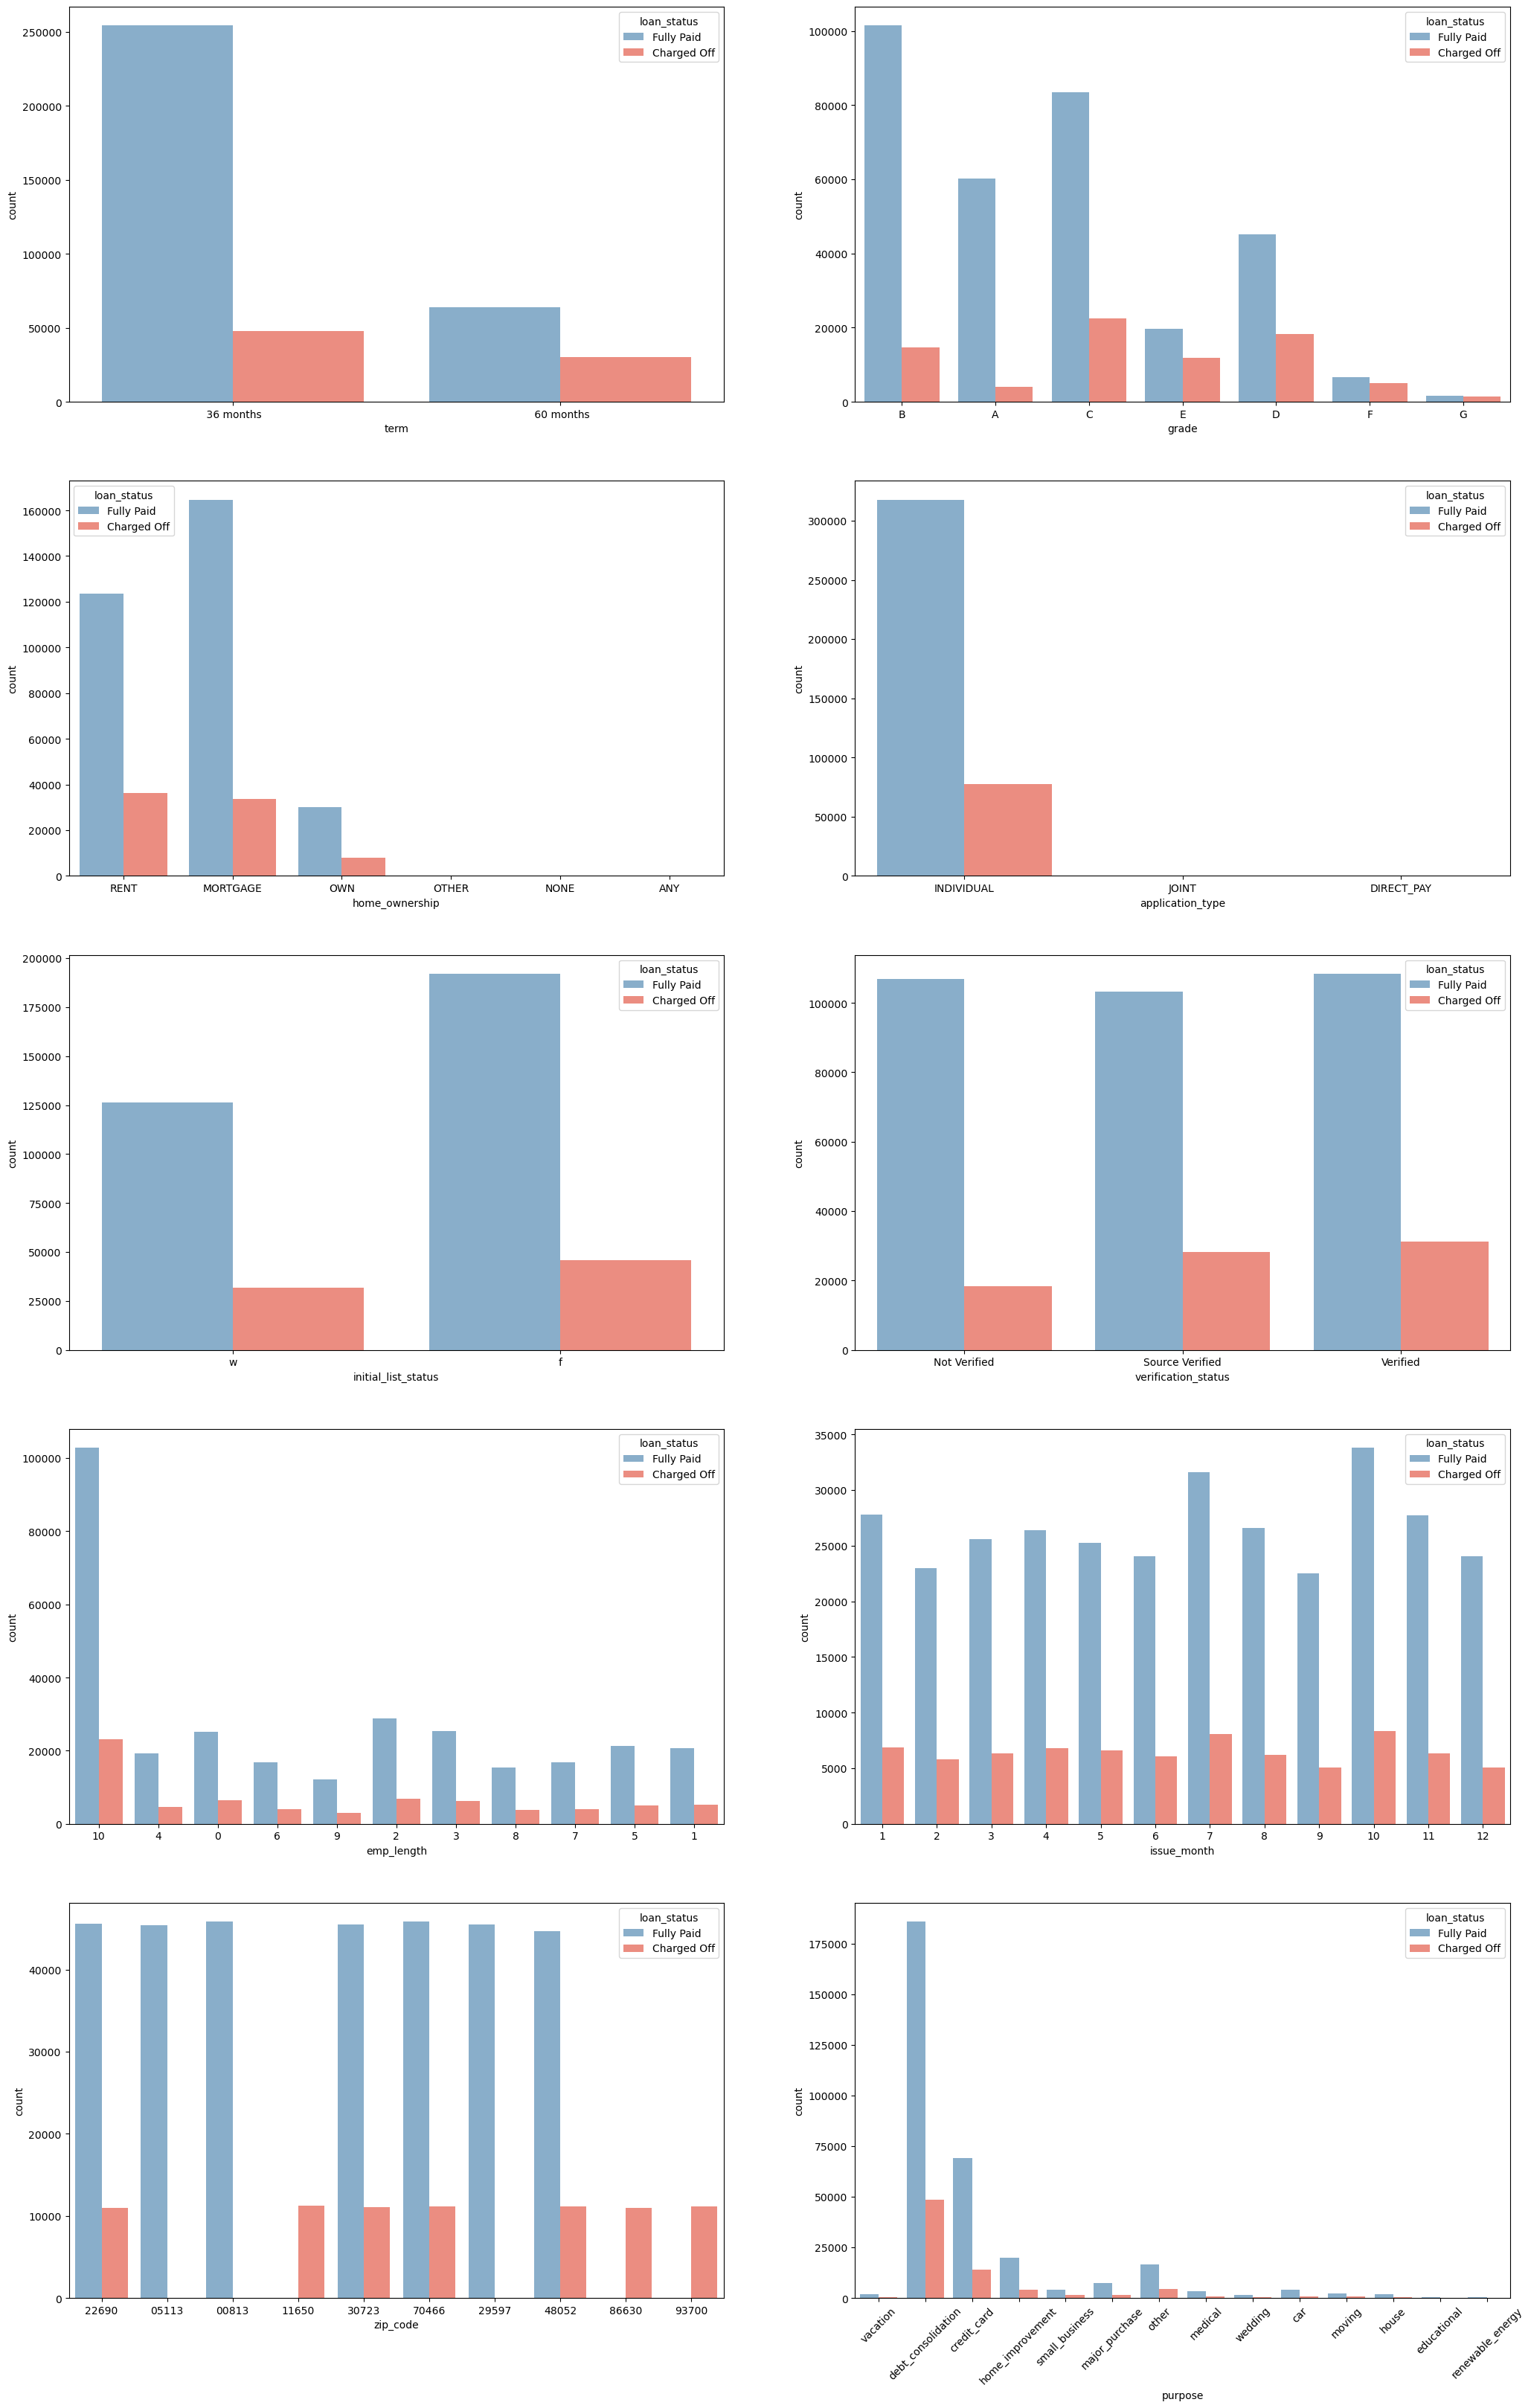

In [280]:
fig,axis= plt.subplots(5,2,figsize=(25,40)) 
sns.countplot(data=df,x='term',hue='loan_status',ax=axis[0,0]) 
sns.countplot(data=df,x='grade',hue='loan_status',ax=axis[0,1]) 
sns.countplot(data=df,x='home_ownership',hue='loan_status',ax=axis[1,0]) 
sns.countplot(data=df,x='application_type',hue='loan_status',ax=axis[1,1]) 
sns.countplot(data=df,x="initial_list_status",hue='loan_status',ax=axis[2][0]) 
sns.countplot(data=df,x="verification_status",hue='loan_status',ax=axis[2][1])
sns.countplot(data=df,x="emp_length",hue='loan_status',ax=axis[3][0])  
sns.countplot(data=df,x="issue_month",hue='loan_status',ax=axis[3][1]) 
sns.countplot(data=df,x="zip_code",hue='loan_status',ax=axis[4][0])  
sns.countplot(data=df,x="purpose",hue='loan_status',ax=axis[4][1]) 
plt.xticks(rotation=45)
plt.show() 

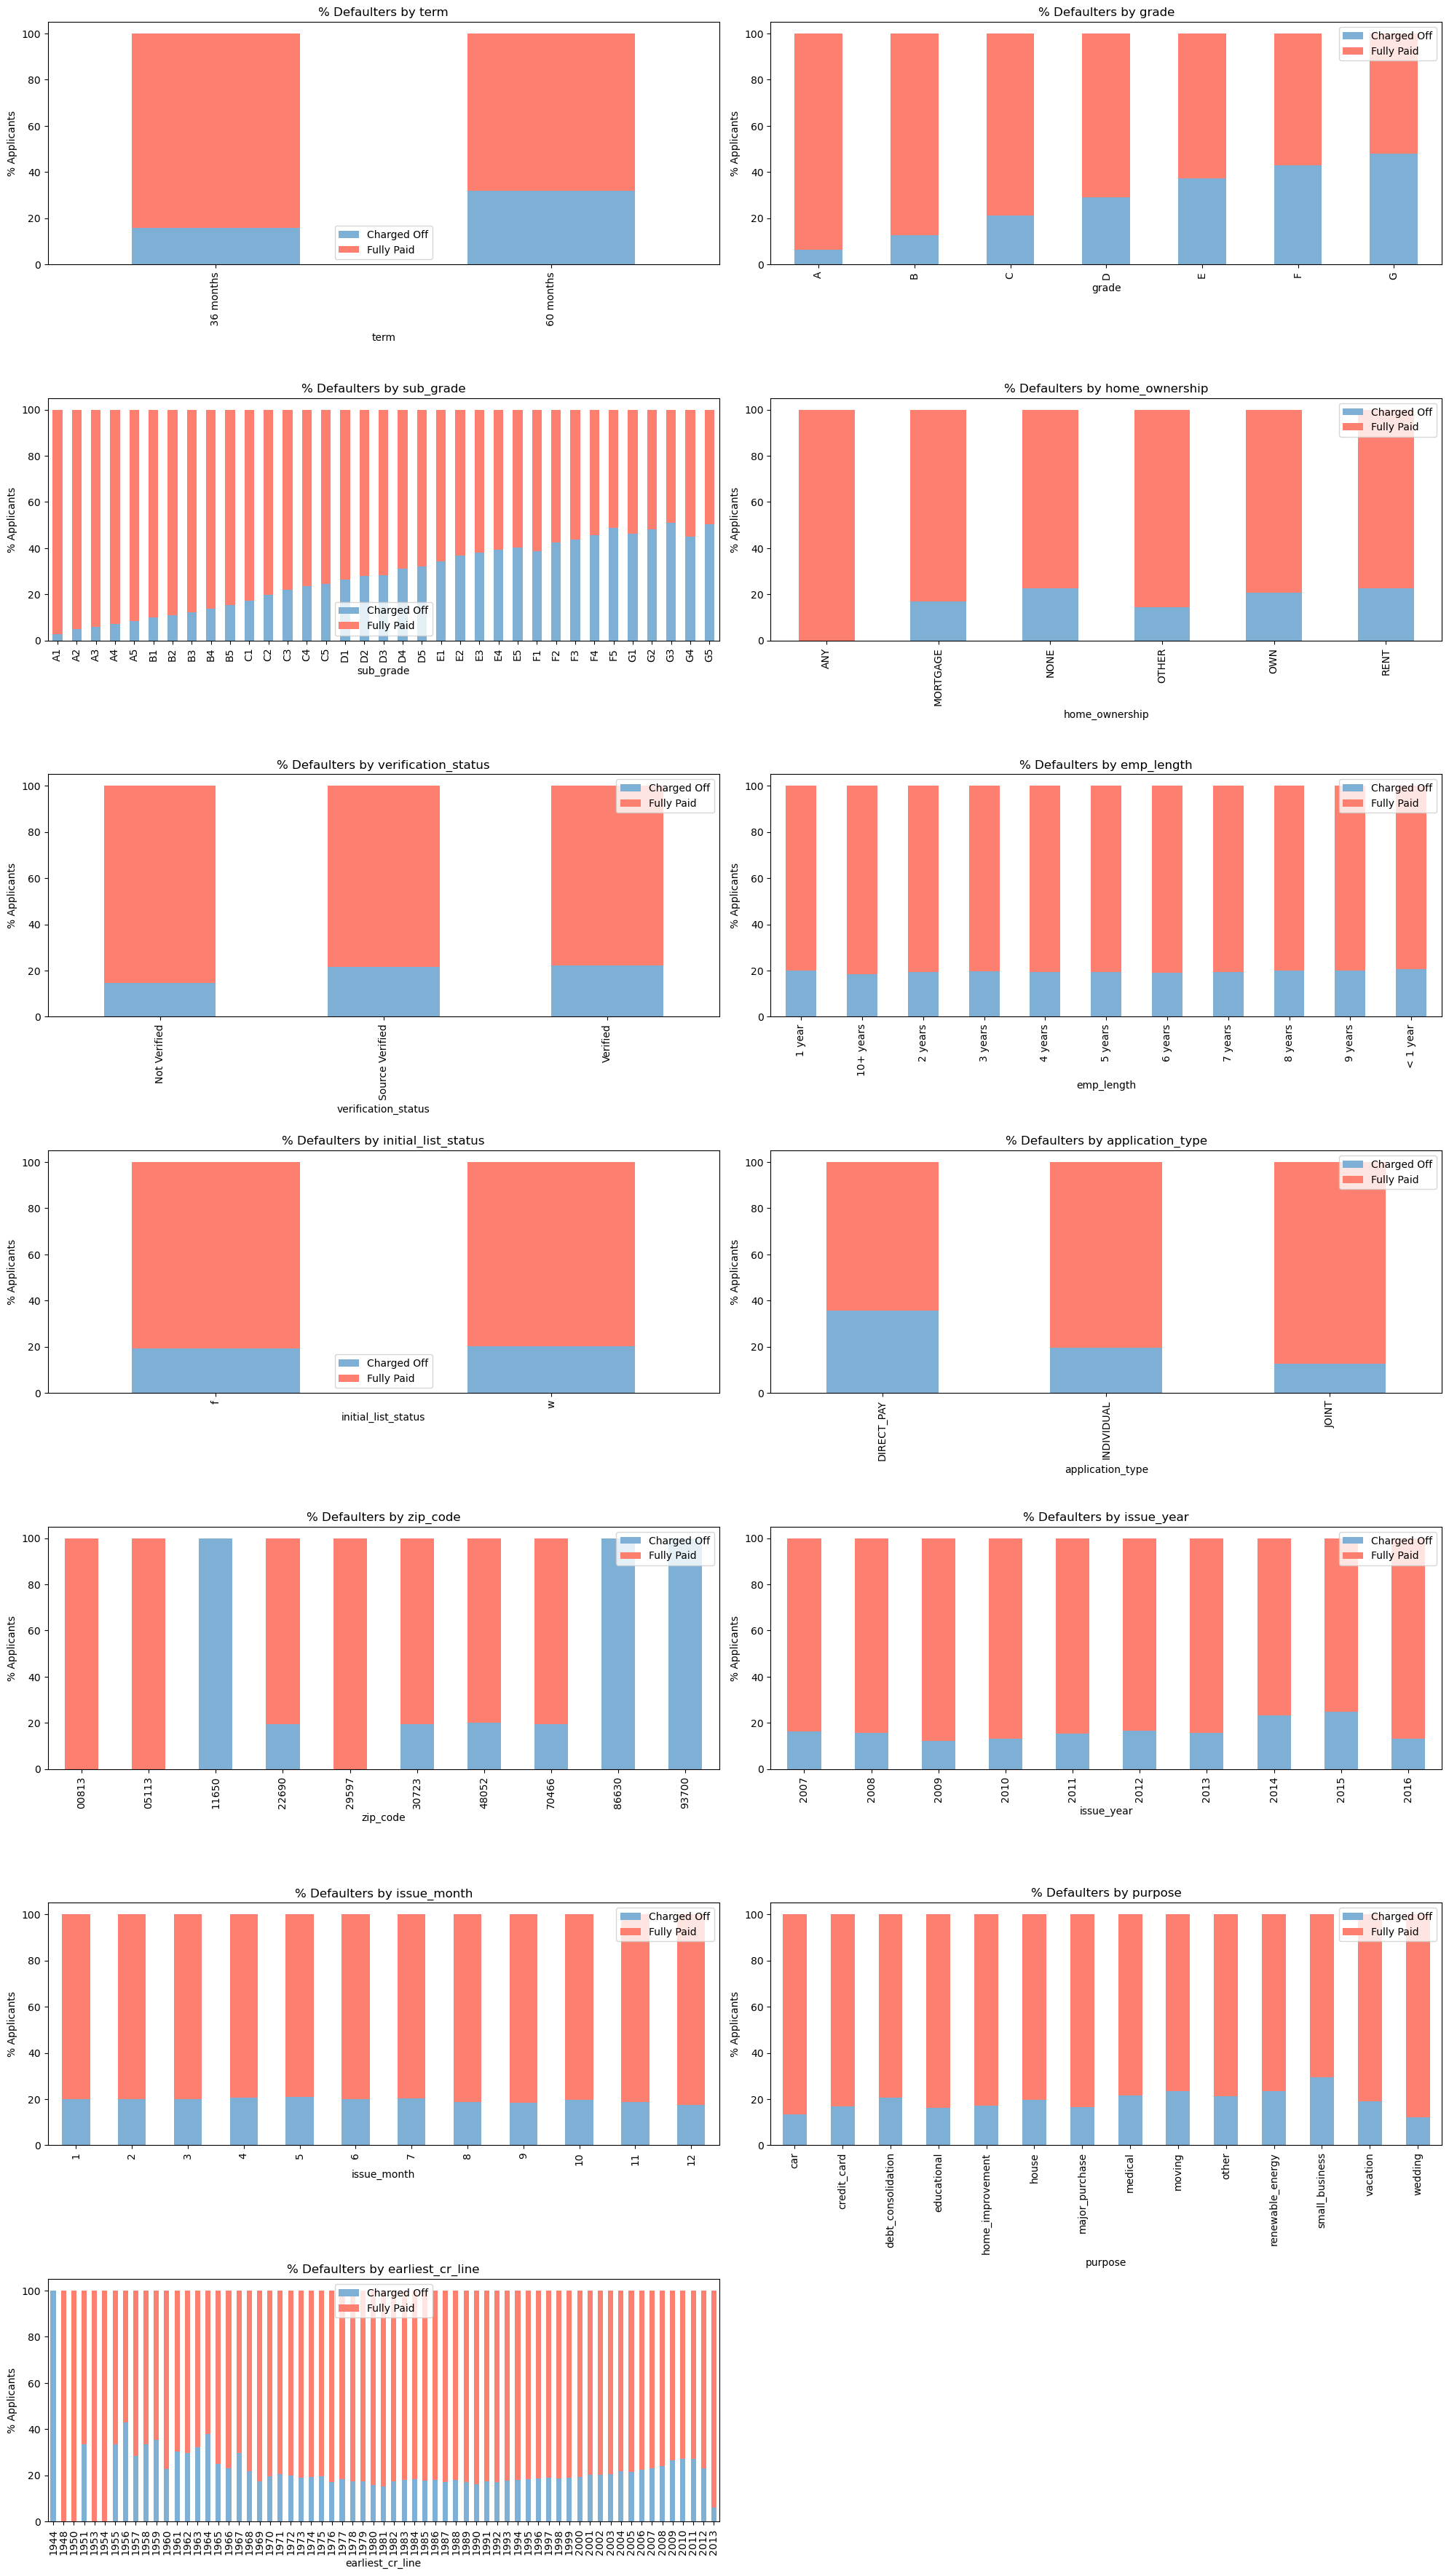

In [270]:
plt.figure(figsize=(20,40))
i=1
for col in cat_cols:
  if col=='loan_status':
    continue
  ax=plt.subplot(8,2,i)

  data1=(pd.crosstab(df[col],df['loan_status'],normalize='index')*100)
  data1=data1.round(2)

  data1.plot(kind='bar', stacked=True,ax=ax)
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1

plt.tight_layout()
plt.show()

ii. Continuous Variables

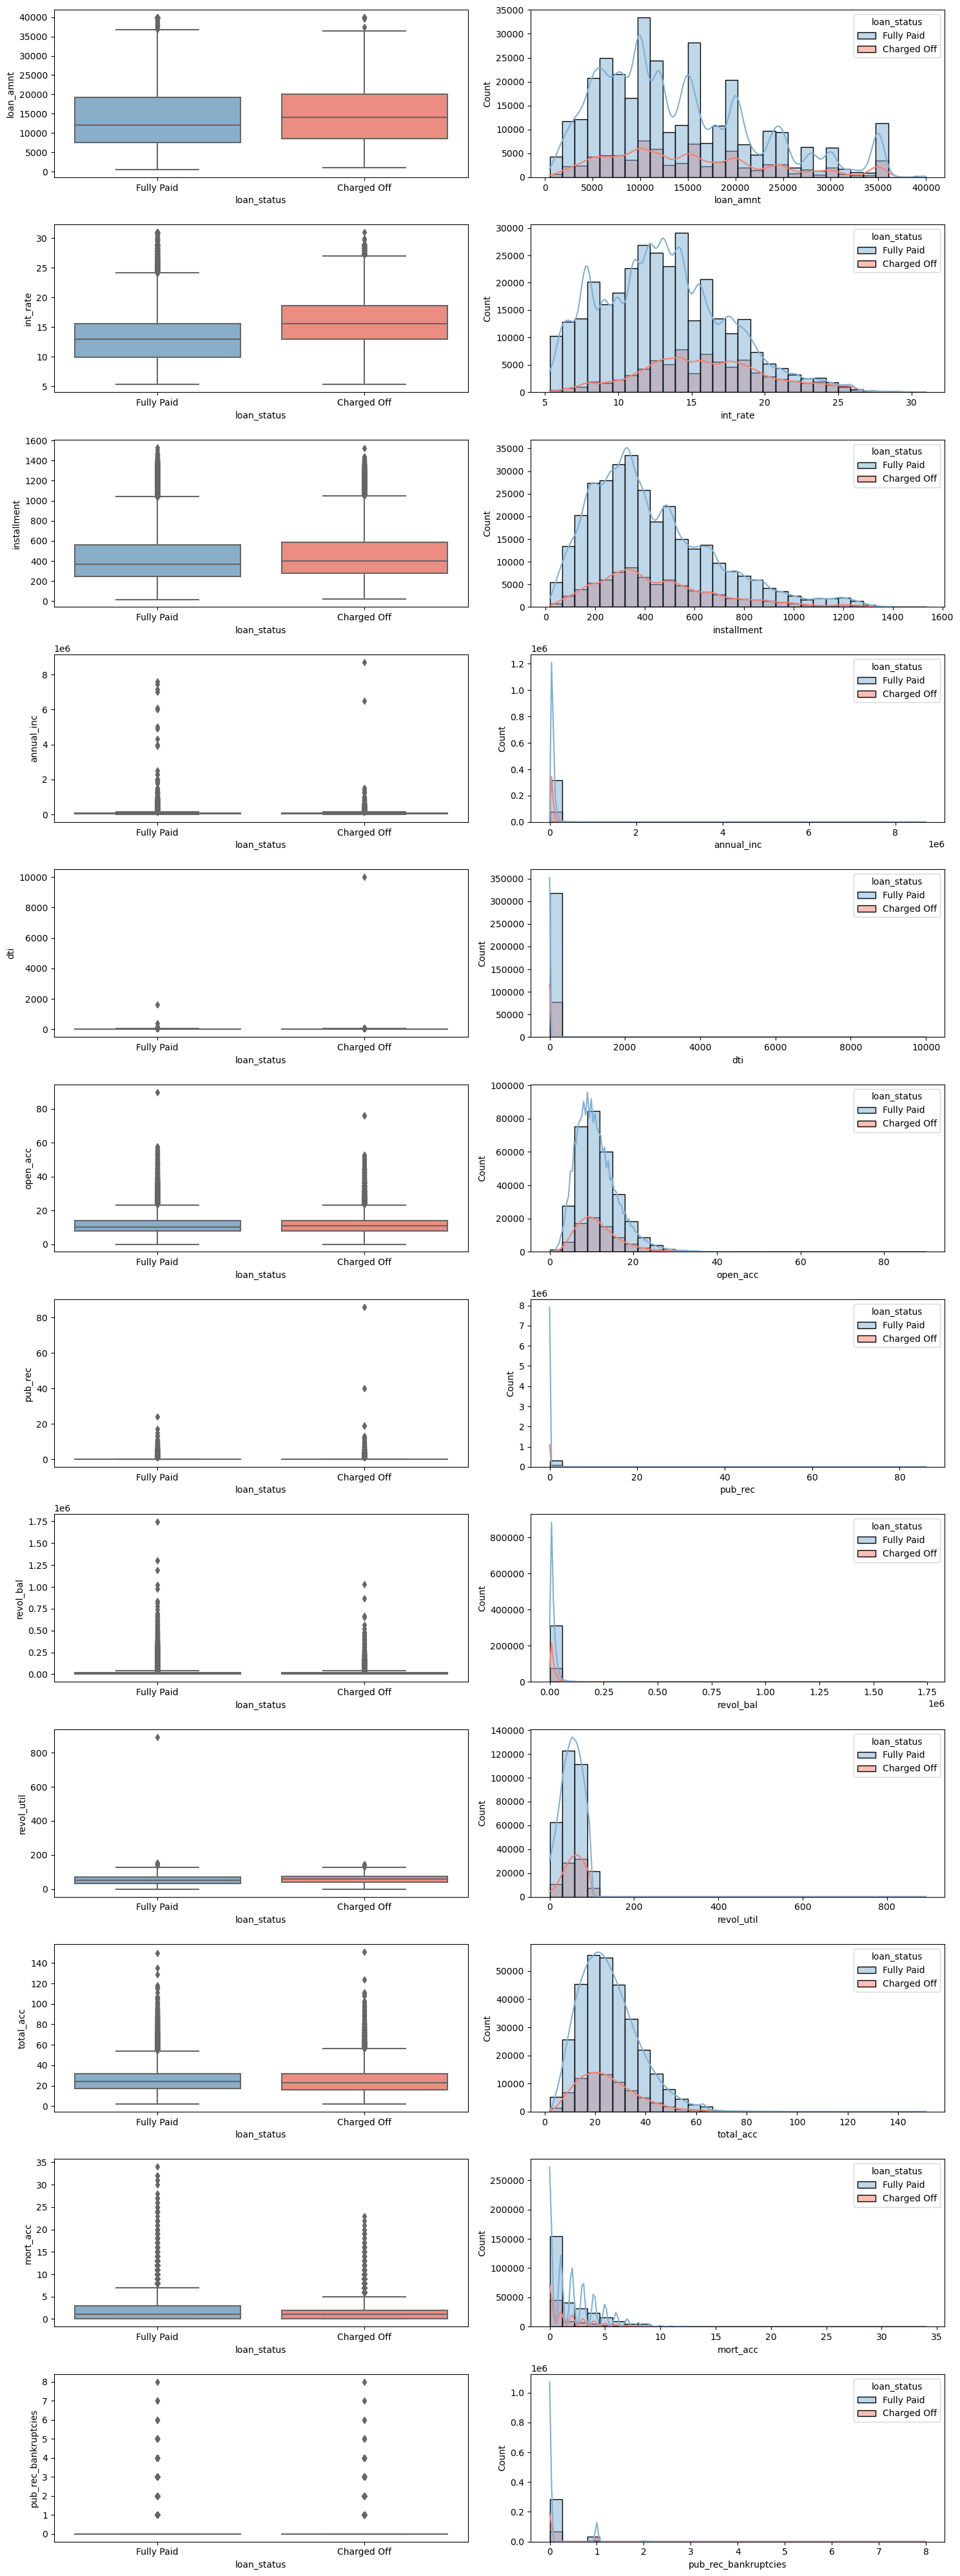

In [281]:
fig, ax = plt.subplots(12,2,figsize=(15,40))
i=0
for col in num_cols:

  sns.boxplot(data=df,x="loan_status",y=col,ax=ax[i,0]) 
  sns.histplot(data=df,x=col,hue='loan_status',ax=ax[i,1],kde=True, fill=True,bins=30)
  i += 1

plt.tight_layout()
plt.show()

#### Multivariate Analysis

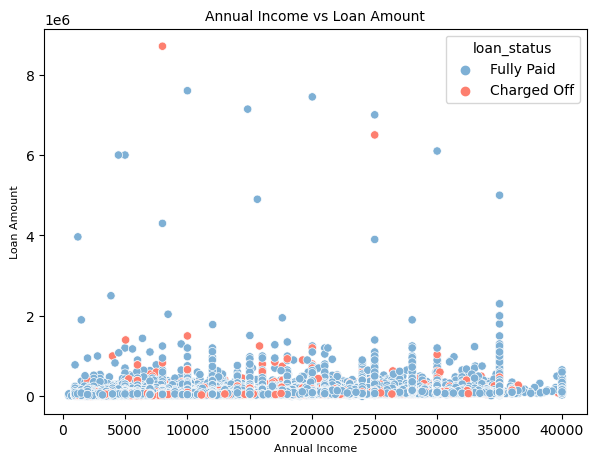

In [272]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='loan_amnt',y='annual_inc',hue='loan_status')
plt.title('Annual Income vs Loan Amount',fontsize=10)
plt.xlabel('Annual Income',fontsize=8)
plt.ylabel('Loan Amount',fontsize=8)
plt.show() 

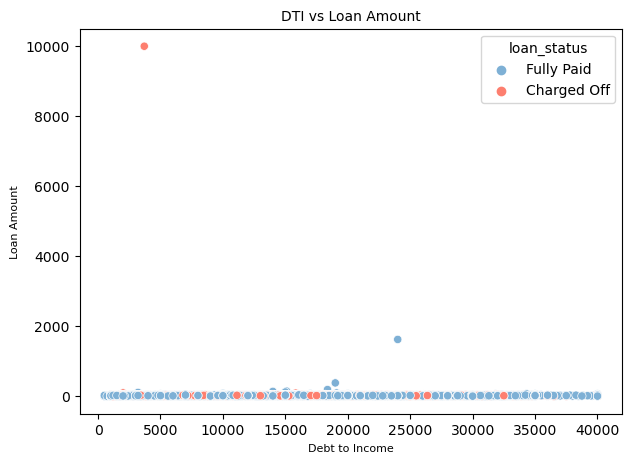

In [273]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='loan_amnt',y='dti',hue='loan_status')
plt.title('DTI vs Loan Amount',fontsize=10)
plt.xlabel('Debt to Income',fontsize=8)
plt.ylabel('Loan Amount',fontsize=8)
plt.show() 

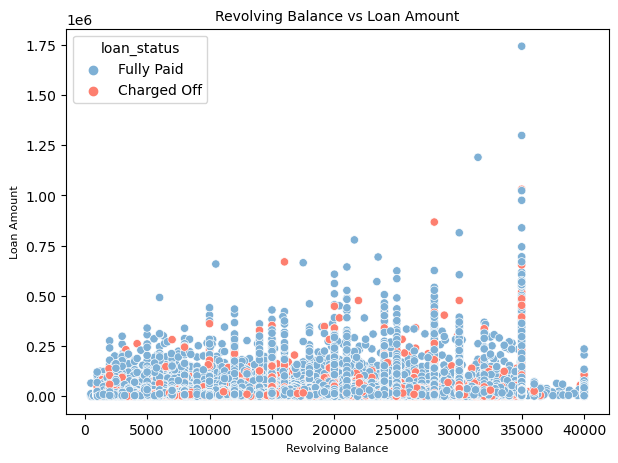

In [274]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='loan_amnt',y='revol_bal',hue='loan_status')
plt.title('Revolving Balance vs Loan Amount',fontsize=10)
plt.xlabel('Revolving Balance',fontsize=8)
plt.ylabel('Loan Amount',fontsize=8)
plt.show()

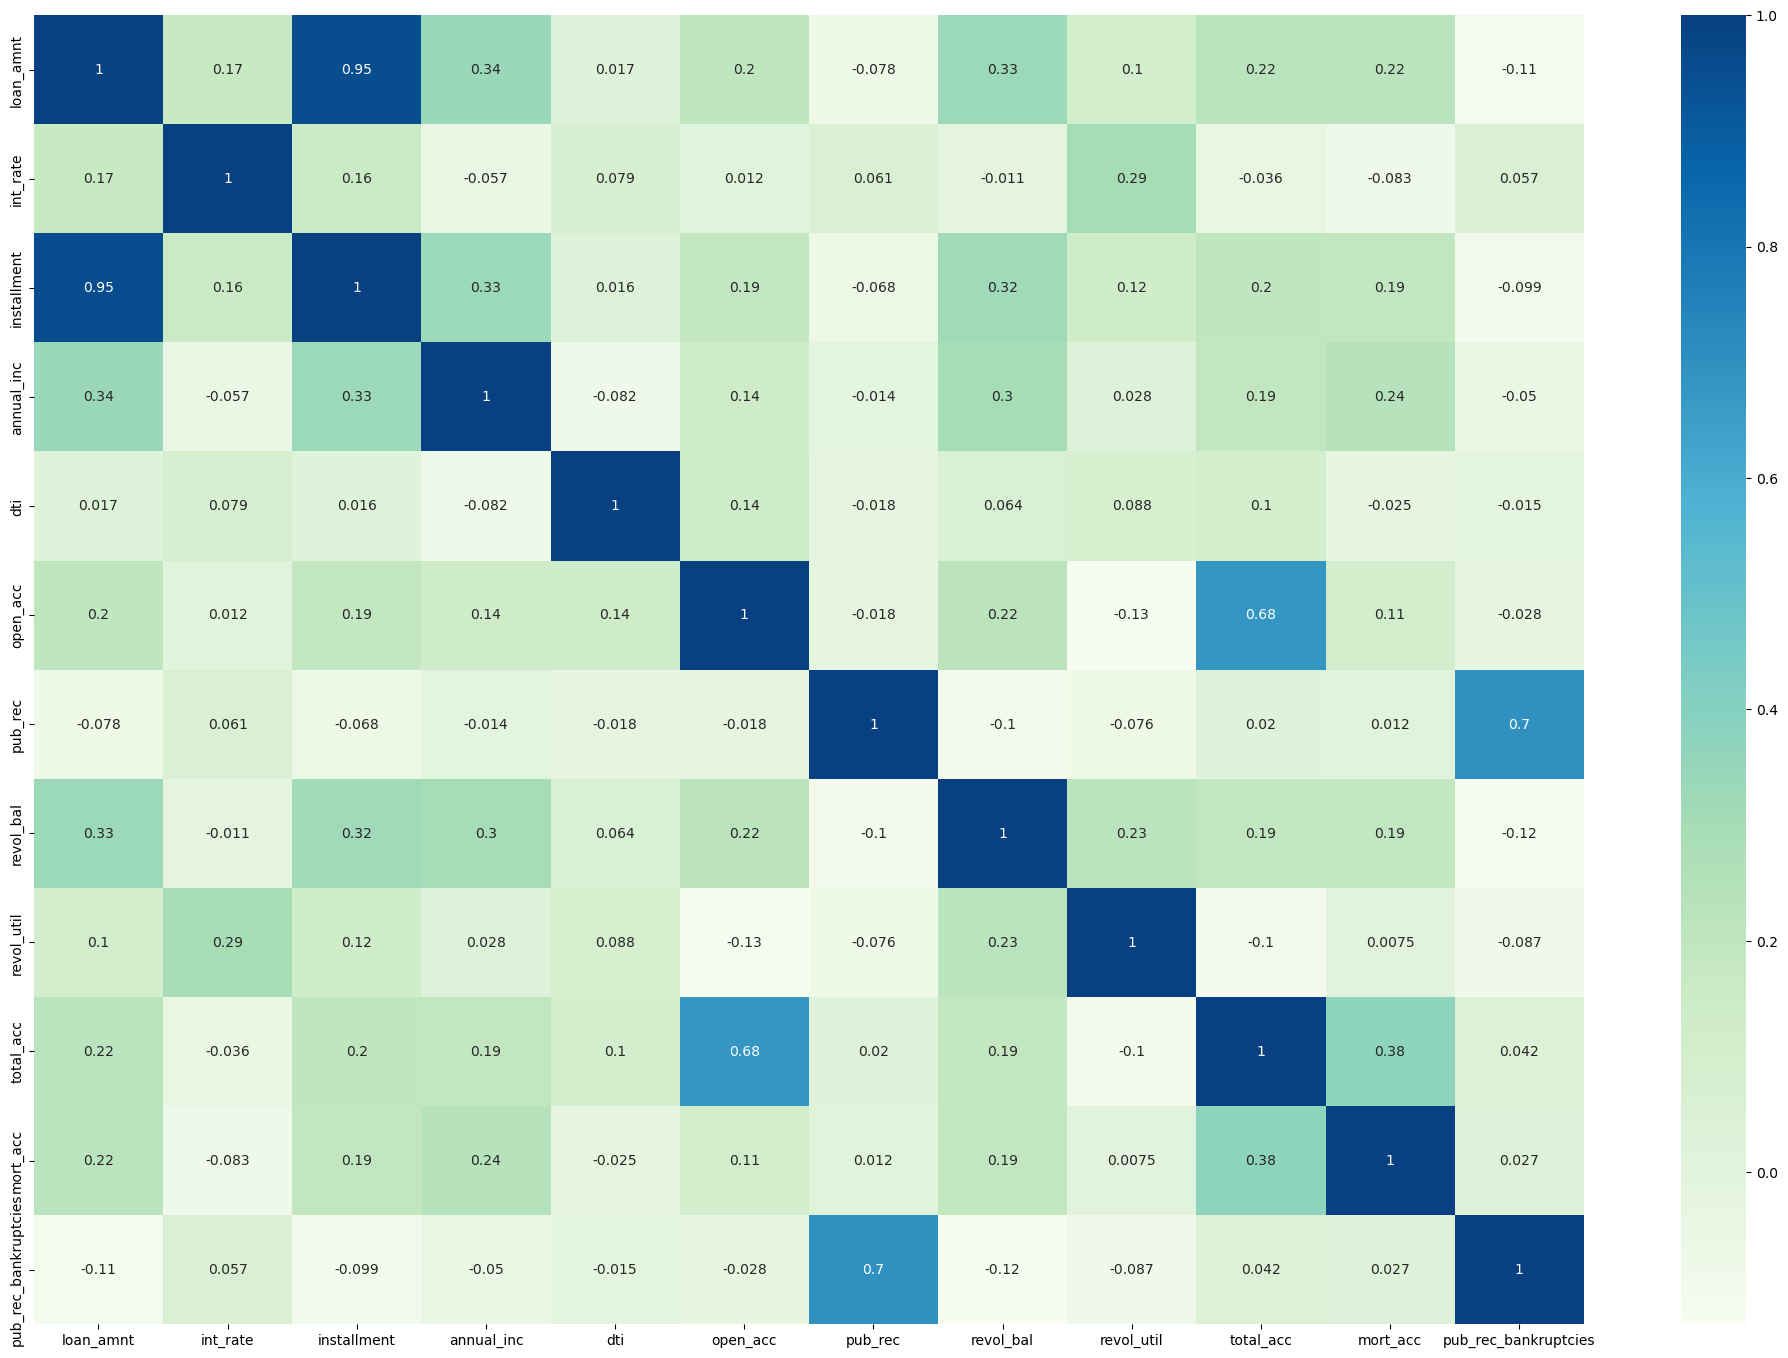

In [275]:
plt.figure(figsize=(25,17))
sns.heatmap(df[num_cols].corr(), cmap="GnBu",annot=True)
plt.show() 

There seems to be a high correlation between loan amount and installment so we can drop one of them for our model building later.

### Handling Missing Values

There are 22927 missing values in emp_title,18301 in emp_length,1756 in title,276 in revol_util,37795 in mort_acc and 535 in pub_rec_bankruptcies.

In [277]:
df['emp_length']=df['emp_length'].replace({'< 1 year':'0','10+ years':'10'})
df['emp_length']=df['emp_length'].str.replace(r'\D','',regex=True)

In [278]:
df['emp_title'].fillna('Unknown',inplace=True)
df['title'].fillna('Unknown',inplace=True)

In [282]:
imputer=KNNImputer()
df['emp_length']=imputer.fit_transform(df[['emp_length']])

In [283]:
mort_acc_mode=df.groupby('total_acc')['mort_acc'].agg(lambda x: pd.Series.mode(x)[0])

In [284]:
def fill_mort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_mode[total_acc].round()
    else:
        return mort_acc

In [285]:
df['mort_acc']=df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [286]:
df.dropna(subset=['revol_util','pub_rec_bankruptcies'],inplace=True)

In [287]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
issue_year              0
issue_month             0
zip_code                0
dtype: int64

### Outlier Treatment

We will not consider mort_acc,pub_rec & pub_rec_bankruptcies for outlier removal as we are going to take care of these columns later.

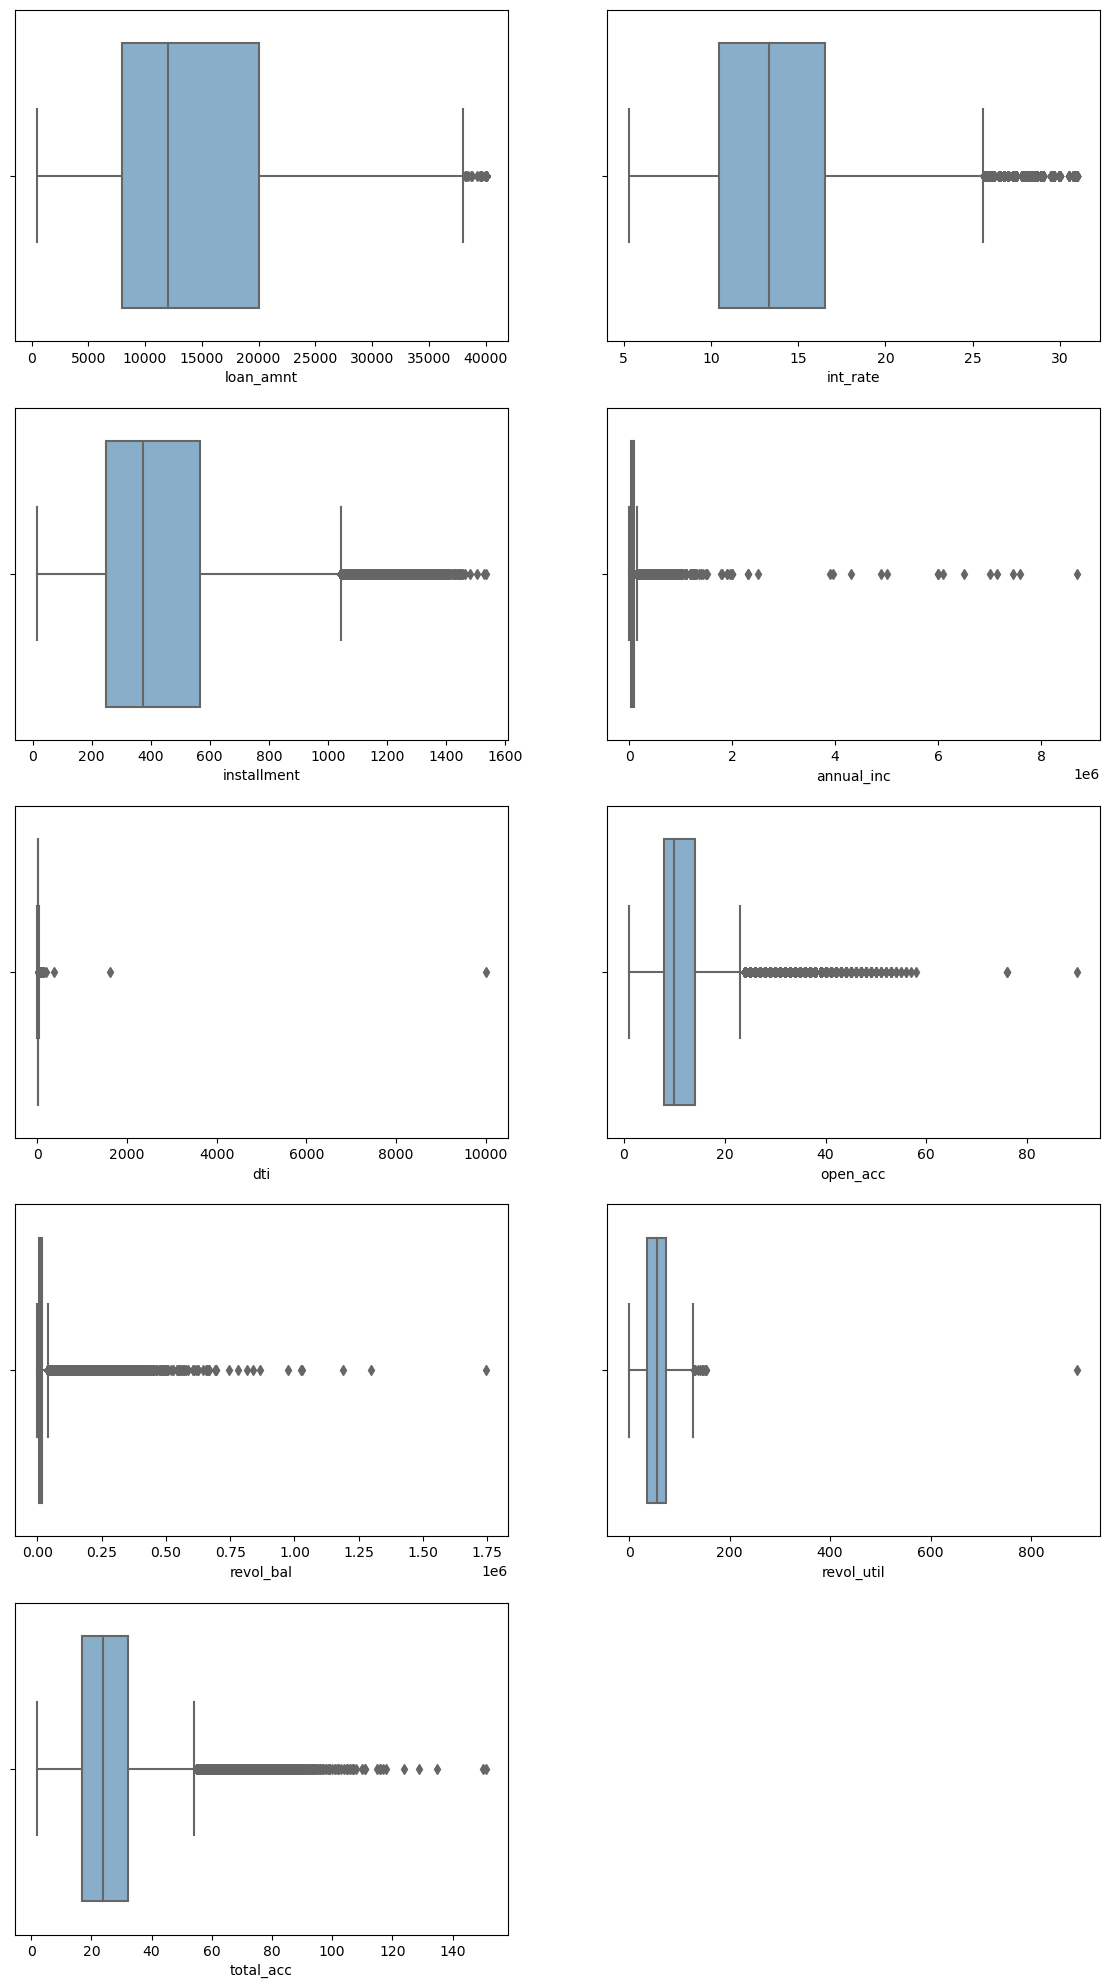

In [288]:
outlier_cols=[item for item in num_cols if item not in ['mort_acc','pub_rec','pub_rec_bankruptcies']]
plt.figure(figsize=(14,25))
i=1
for col in outlier_cols:
   ax=plt.subplot(5,2,i)
   sns.boxplot(x=df[col],ax=ax)
   i+=1
plt.show()

In [290]:
#Using IQR method
# for col in outlier_cols:
#    Q1=df[col].quantile(0.25)
#    Q3=df[col].quantile(0.75)
#    IQR=Q3-Q1
#    lower=Q1-1.5*IQR
#    upper=Q3+1.5*IQR
#    df=df[(df[col]>=lower)&(df[col]<=upper)]

In [291]:
# Using Z-Scores
for col in outlier_cols:
   mean=df[col].mean()
   stdev=df[col].std()
   lower=mean-3*stdev
   upper=mean+3*stdev
   df=df[(df[col]>=lower)&(df[col]<=upper)]

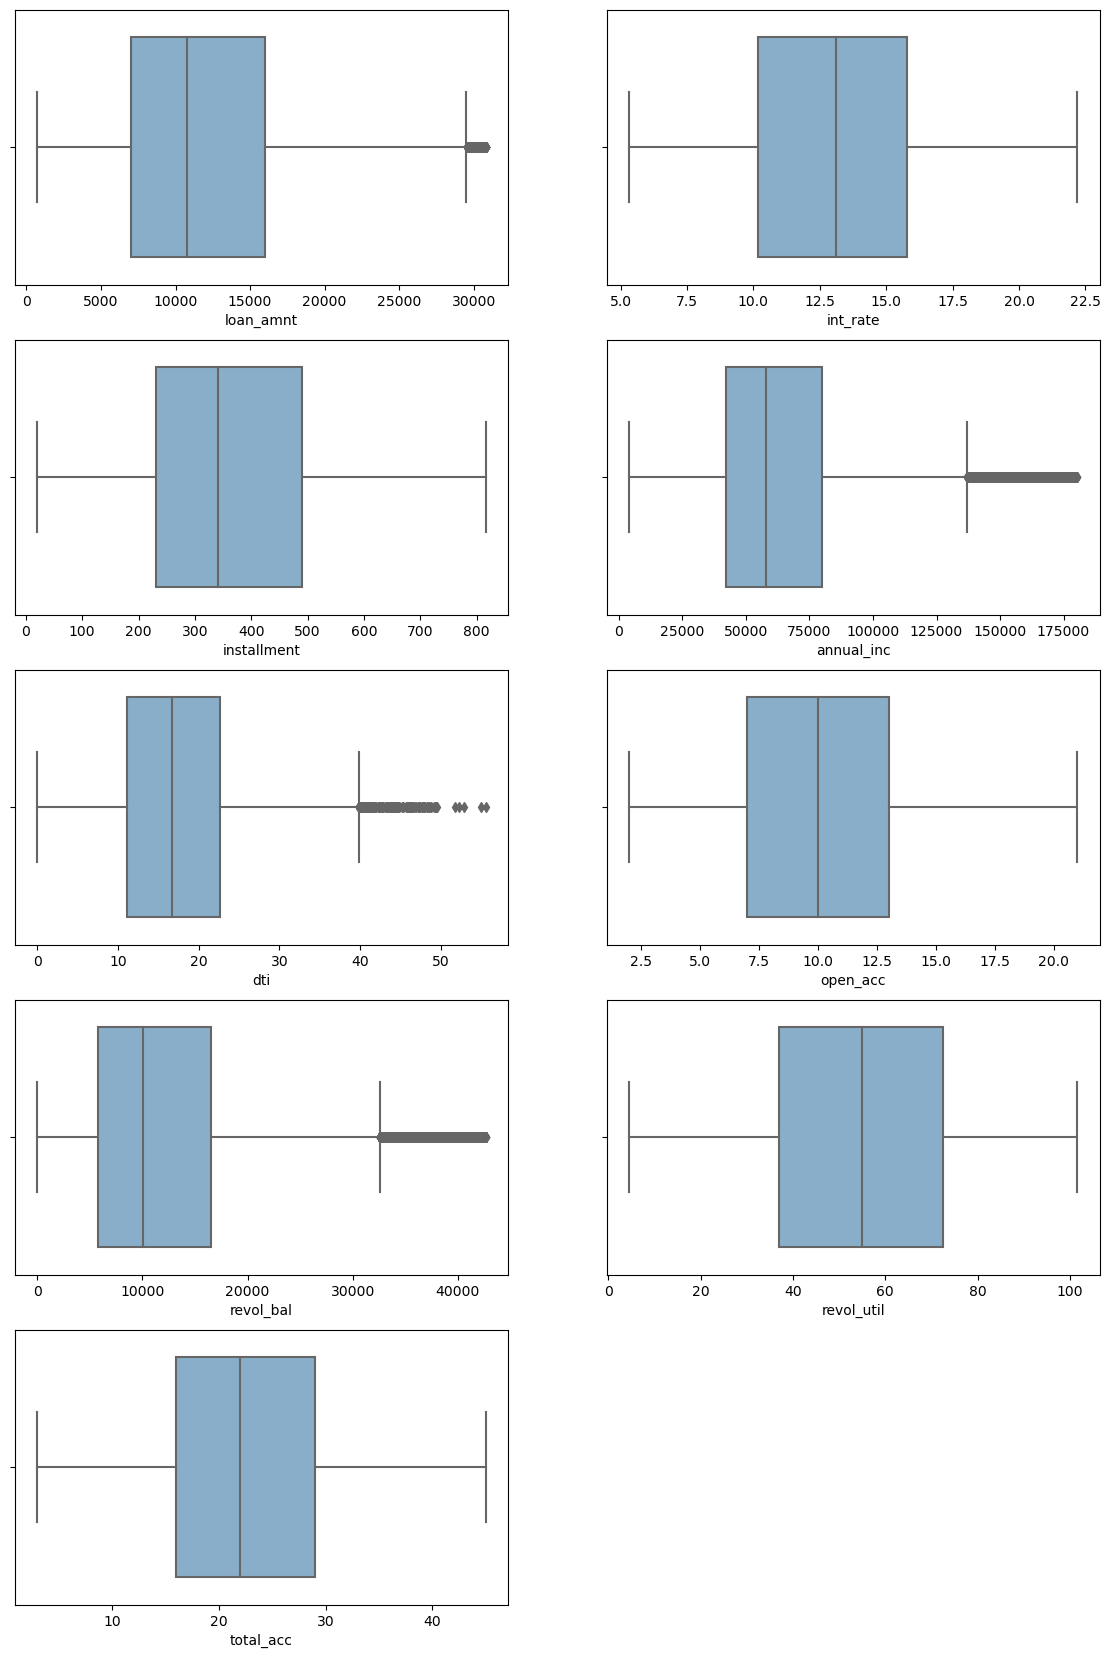

In [292]:
plt.figure(figsize=(14,25))
i=1
for col in outlier_cols:
   ax=plt.subplot(6,2,i)
   sns.boxplot(x=df[col],ax=ax)
   i+=1
plt.show()

### Data Preparation for Modelling

In [293]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']
y = y.replace({'Fully Paid': 0, 'Charged Off': 1}).astype(int)

#### Feature Engineering


Three columns have been modified as below:

In [294]:
X['pub_rec']=X['pub_rec'].apply(lambda x:0 if x==0 else 1)
X['mort_acc']=X['mort_acc'].apply(lambda x:0 if x==0 else 1)
X['pub_rec_bankruptcies']=X['pub_rec_bankruptcies'].apply(lambda x:0 if x==0 else 1)

In [296]:
#transform term column
X['term'].replace({' 36 months':36,' 60 months':60},inplace=True)

#transform home_ownership column
X['home_ownership'].replace({'ANY':'OTHER','NONE':'OTHER'},inplace=True)

#transform verification_status column
X['initial_list_status'].replace({'w':0,'f':1},inplace=True)

#drop these columns for model building
X.drop(columns=['issue_d','issue_year','earliest_cr_line','emp_title','title','address','sub_grade','installment'],inplace=True)

#### 1. Encoding of Categorical Columns

In [297]:
cat_columns=X.select_dtypes(include=['object']).columns

In [298]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(X[cat_columns])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(cat_columns),index=X.index)
X = pd.concat([X,one_hot_df],axis=1)
X.drop(cat_columns,axis=1,inplace=True)

In [299]:
print(X.shape)  # Should be (same number of rows, number of features)
print(y.shape)  # 

(298581, 67)
(298581,)


#### 2. Splitting into Train and Test Data

In [300]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##### 3. Standardization

In [301]:
scaler=StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

###### 4. SMOTE for imbalanced data

In [302]:
y_train.value_counts(normalize=True)*100

0    81.141151
1    18.858849
Name: loan_status, dtype: float64

In [303]:
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [304]:
y_train.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: loan_status, dtype: float64

### Logistic Regression

In [305]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Model Performance Evaluation

In [306]:
y_train_pred=pd.DataFrame(model.predict(X_train))
y_pred=pd.DataFrame(model.predict(X_test))

In [307]:
report_train=classification_report(y_train,y_train_pred)
report_test=classification_report(y_test,y_pred)
print("Train Reports are: \n"+report_train)
print("Test Reports are: \n"+report_test)

Train Reports are: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    193817
           1       0.79      0.82      0.81    193817

    accuracy                           0.80    387634
   macro avg       0.80      0.80      0.80    387634
weighted avg       0.80      0.80      0.80    387634

Test Reports are: 
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     48491
           1       0.47      0.81      0.60     11226

    accuracy                           0.79     59717
   macro avg       0.71      0.80      0.73     59717
weighted avg       0.86      0.79      0.81     59717



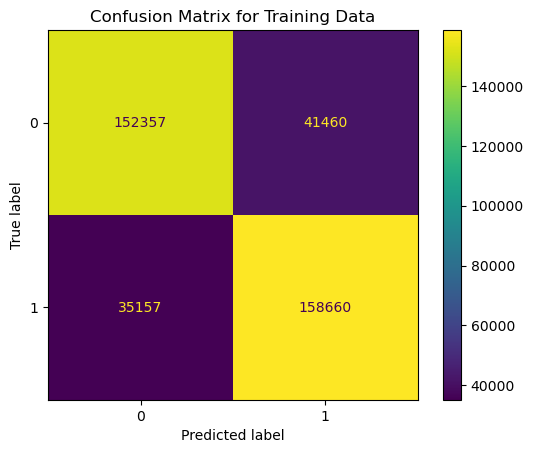

In [308]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

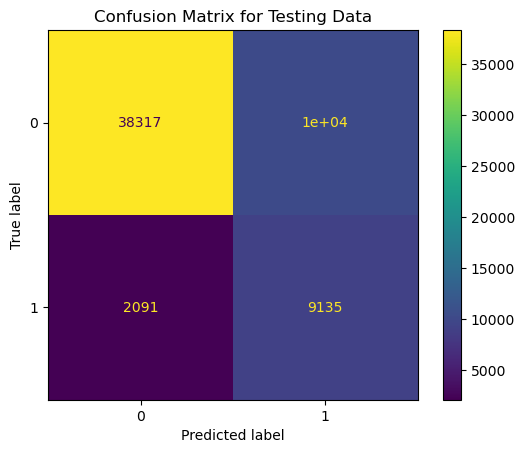

In [309]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

### Model Interpretability

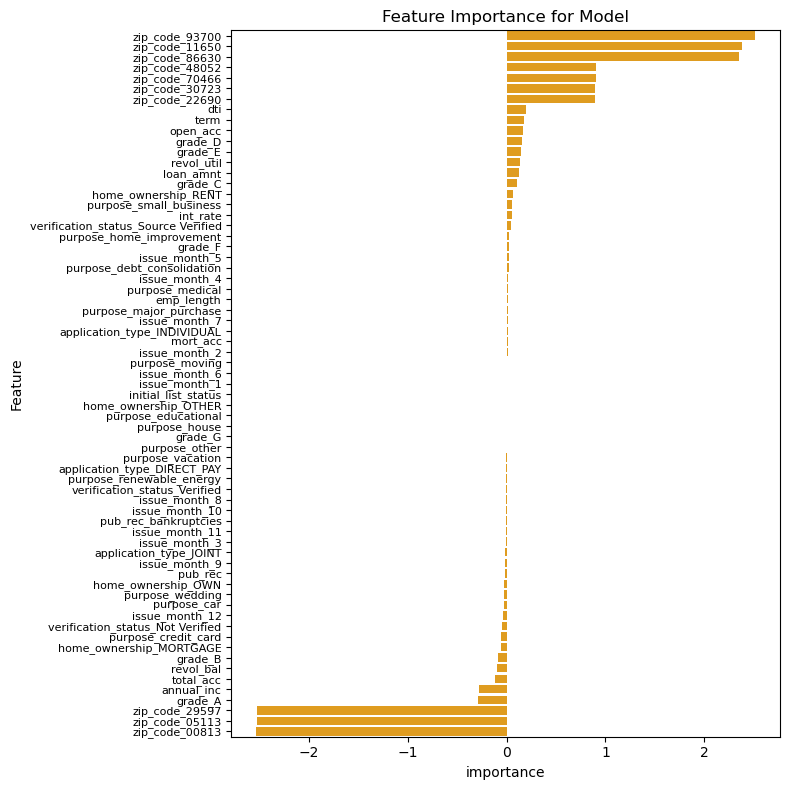

In [310]:
coefficients=model.coef_[0]
feature_names=X_train.columns
feature_importance_df=pd.DataFrame({'feature':feature_names,'importance':coefficients})
feature_importance_df=feature_importance_df.sort_values(by='importance',ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(y = feature_importance_df['feature'],
           x =  feature_importance_df['importance'],color='orange')
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### ROC Curve & AUC

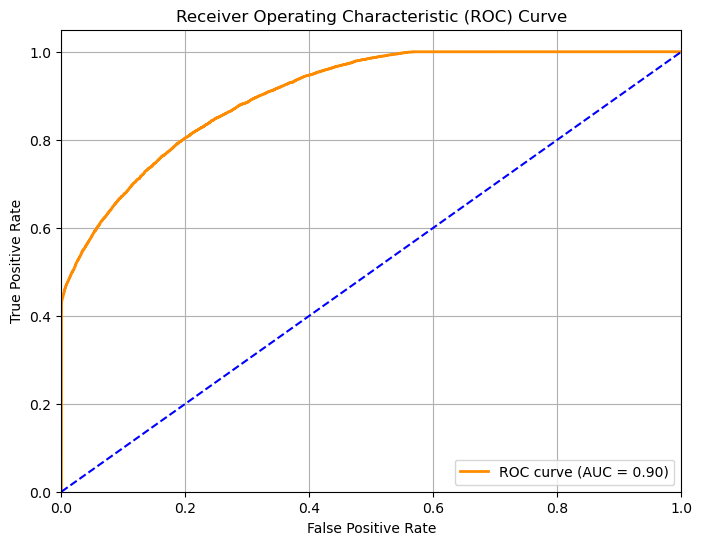

In [311]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()   

### Precision Recall Curve

In [312]:
precision, recall, thr  = precision_recall_curve(y_test, y_pred_proba)

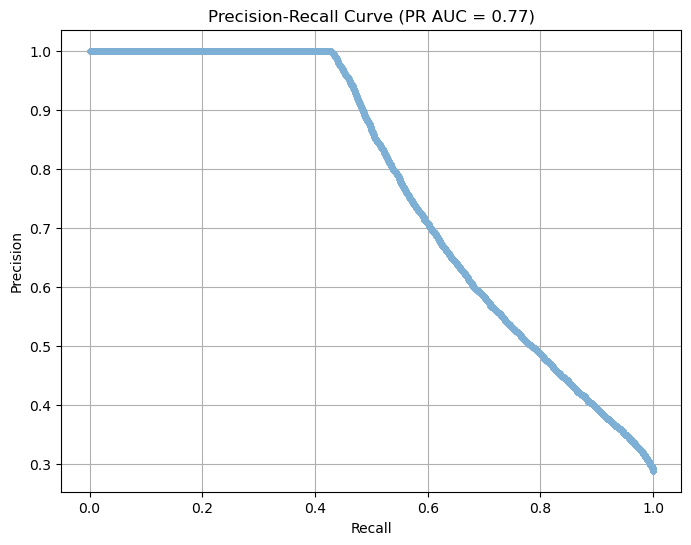

In [313]:
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR AUC = {:.2f})'.format(pr_auc))
plt.grid(True)
plt.show()

#### Plotting Precison & Recall at different Thresholds

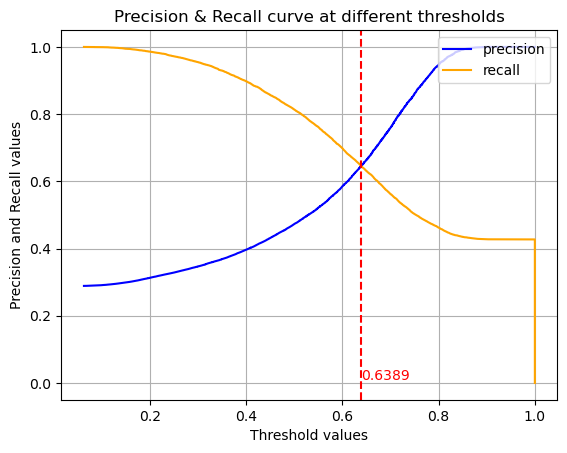

In [314]:
plt.figure()
plt.plot(thr,precision[0:len(thr)],label='precision',color='blue')
plt.plot(thr,recall[0:len(thr)],label='recall',color='orange')
intersection_thr = thr[np.argmin(np.abs(precision[:-1]-recall[:-1]))].round(4)
plt.axvline(intersection_thr, linestyle='--', color='red')
plt.text(intersection_thr, 0.01, str(intersection_thr), ha='left', color='red')
plt.title("Precision & Recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision and Recall values")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [315]:
threshold_considered = intersection_thr
y_pred_custom = (y_pred_proba>threshold_considered).astype('int')
print(classification_report(y_test,y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     48491
           1       0.65      0.65      0.65     11226

    accuracy                           0.87     59717
   macro avg       0.78      0.78      0.78     59717
weighted avg       0.87      0.87      0.87     59717



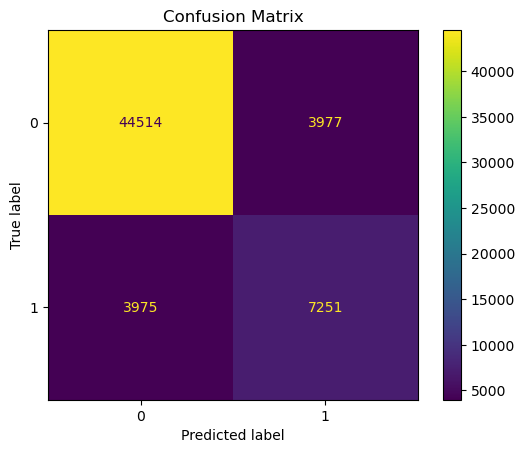

In [316]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

#### Tradeoff Questions:
* How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

  To ensure that our model predicts less false positives, precision of the model should be high.
  
  
  
* Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

  To ensure that our model captures all positives from the dataset or is able to identify all defaulters/non-performing assets , recall should be high. There is a tradeoff between Precision and Recall. As we try to increase precision, recall will be decreased and vice-versa.For this scenario, F1-score should be chosen as a metric to measure the model performance, in a way to achieve the balance b/w precision  and recall.
  
  

### Questions

1. What percentage of customers have fully paid their Loan Amount?\
80% of the customers have fully paid their loan and 20% are defaulters
2. Comment about the correlation between Loan Amount and Installment features.\
Loan amount and installment are highly correlated(correlation coefficient=0.95) as it is obvious that high loan amount will have high installment amount
3. The majority of people have home ownership as _______.\
Most of the people have home ownership as mortgage
4. People with grades ‘A’ are more likely to fully pay their loan.\
True. People with grade A are more likely to fully pay their loan
5. Name the top 2 afforded job titles.\
Teacher and Manager are two afforded job titles
6. Thinking from a bank's perspective, which metric should our primary focus be on.\
The best metric to consider is F1 score as we need to give importance to both precision and recall. We don't want to miss potential customers and at the same time we also don't want to give loan to defaulters.
7. How does the gap in precision and recall affect the bank?\
In case of low recall, false negatives will be high and there will be high number of defaulters.In case of low precision, false positives will be high and LoanTap will lose potential customers.Recall and Precision are contradictory to each other. Increase in one metric will decrease the other.We have to achieve the balance between precision and recall.
8. Which were the features that heavily affected the outcome?\
The features zip_code_29597, zip_code_05113, zip_code_00813, annual_inc, loan_amnt, zip_code_86630, zip_code_11650, zip_code_93700, dti, open_acc affected the model outcome heavily
9. Will the results be affected by geographical location? (Yes/No)\
Yes. As we can see that zip code is affecting the model which implies that geographical location will affect the results.

## Insights

* 80% of the customers have fully paid their loan and 20% are defaulters
* Loan amount and installment are highly correlated as it is obvious that high loan amount will have high installment amount
* Loan taken for short term, i.e. 3 years are most likely to be fully paid back
* Loans with higher amount are less likely to get paid back
* Loans with higher interest rate are less likely to get paid back  
* Most of the people have home ownership as mortgage
* Suprisingly, loans which are not verified are more likely to be paid back
* Highest No of loans are issued in October month
* Loan taken as joint application type are more likely to be paid back
* People with grade A are more likely to fully pay their loan
* Loan taken for wedding are more likely to be paid back
* People from zip code 00813, 05113 fully pay back their loans whereas people from zip code 11650, 86630, 93700 are all defaulters
* The features zip_code_29597, zip_code_05113, zip_code_00813, annual_inc, loan_amnt, zip_code_86630, zip_code_11650, zip_code_93700, dti, open_acc affected the model outcome heavily
* As per the ROC curve and AU-ROC value of 0.9, the model is able to differenciate well between the defaulters and non-defaulters
* As per the PRC and AU-PRC value of 0.77, the model is able to return accurate results as well as return majority of all positive results(high recall)
* For default threshold value, precision for class 1 is 0.46 and recall for class 1 is 0.81.Recall is high and precision is low for this threshold value.
* For this particular case, we have a tradeoff between precision and recall, we try to find best threshold value where precision is equal to recall value. To increase the precision value, we have to bear the reduction in recall.
* For threshold 0.6382, model has a F1-score of 0.65 for class 1. Precision has been increased from 0.47 to 0.65 and Recall has been decreased from 0.81  to 0.65.

## Recommendations:

1. LoanTap may provide more short term loans, i.e. for 3 years, without much risk.
2. LoanTap may provide more joint loans and scrutinize more individual and direct pay application types.
3. Analyze carefully the loan applications of customers with grades D, E, F and G. Do not provide them loans or provide smaller loans to these customers for shorter periods.
4. LoanTap may reduce the loans given for small businesses or analyze their applications thoroughly prior giving loans.
5. Do not provide loans to applicants with zip codes 11650, 86630, 93700.
6. Investigate the verifier as the verified loans are not getting paid back and scrutinize the verification process.
7. LoanTap may offer fancy offers like low interest rates or higher loan amount to applicants from zip codes 00813, 05113 to attract more leads.
8. LoanTap may use this model to predict the chances of default before loan approval.
